In [1]:
%run SAT_help_functions.ipynb
%matplotlib inline

<AxesSubplot:xlabel='BIC', ylabel='Count'>

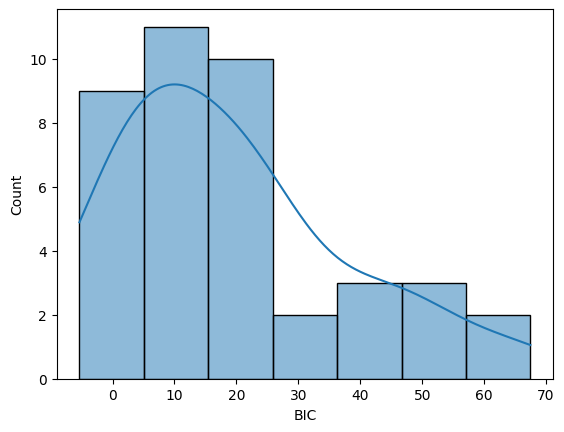

In [8]:
df_DDM = pd.read_csv("DDMresultDutilh2019.csv")
df_OUM = pd.read_csv("OUMresultDutilh2019.csv")
sns.histplot(df_DDM["BIC"] - df_OUM["BIC"],kde=True)

<AxesSubplot:xlabel='BIC', ylabel='Count'>

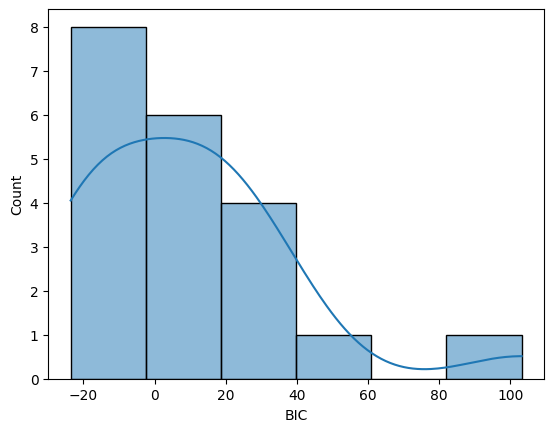

In [9]:
df_OUM2a = pd.read_csv("OUM2aresultDutilh2019.csv")
df_OUM2k = pd.read_csv("OUM2kresultDutilh2019.csv")
sns.histplot(df_OUM2a["BIC"] - df_OUM2k["BIC"],kde=True)

<AxesSubplot:xlabel='BIC', ylabel='Count'>

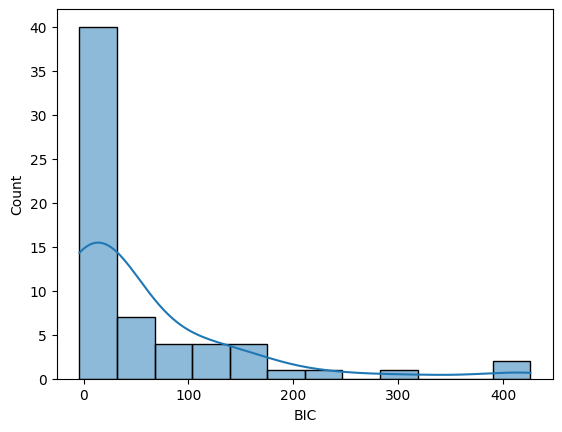

In [10]:
df_DDM = pd.read_csv("DDMresultDutilh2013.csv")
df_OUM = pd.read_csv("OUMresultDutilh2013.csv")
sns.histplot(df_DDM["BIC"] - df_OUM["BIC"],kde=True)

<AxesSubplot:xlabel='BIC', ylabel='Count'>

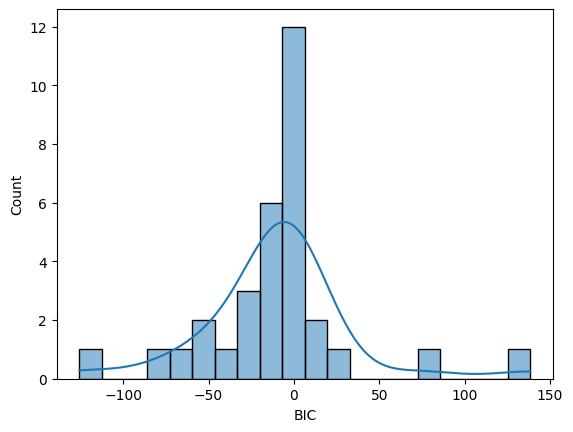

In [11]:
df_OUM2a = pd.read_csv("OUM2aresultDutilh2013.csv")
df_OUM2k = pd.read_csv("OUM2kresultDutilh2013.csv")
sns.histplot(df_OUM2a["BIC"] - df_OUM2k["BIC"],kde=True)

In [114]:
OUM_2k2ter = pd.read_csv("OUM2k2terresultDutilh2019.csv")[['Participant', 'BIC']]
OUM_2v2a2ter = pd.read_csv("OUM2v2a2terresultDutilh2019.csv")[['Participant', 'BIC']]
OUM_2v2k2ter = pd.read_csv("OUM2v2k2terresultDutilh2019.csv")[['Participant', 'BIC']]

In [115]:
OUM_all = pd.concat((OUM_2k2ter, OUM_2v2a2ter, OUM_2v2k2ter))
models = ['OUM_2k2ter']*20+ ['OUM_2v2a2ter']*20+['OUM_2v2k2ter']*20
OUM_all['Model'] = models

In [116]:
data = OUM_all.loc[(OUM_all['Model']=='OUM_2v2k2ter')|(OUM_all['Model']=='OUM_2v2a2ter')]
#sns.catplot(data=data, x="Model", y="BIC", hue = "Participant", kind="point", 
#            height=6, aspect=8/6)

In [117]:
improve = np.array(data["BIC"][0:20]) - np.array(data["BIC"][20:40])>0
change = []
for i in np.concatenate((improve,improve)):
    if i:
        change.append(sns.dark_palette("#b285bc")[5]) 
    
    else:
        change.append(sns.dark_palette("#79C")[5]) 

In [118]:
data["change"] = change

/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


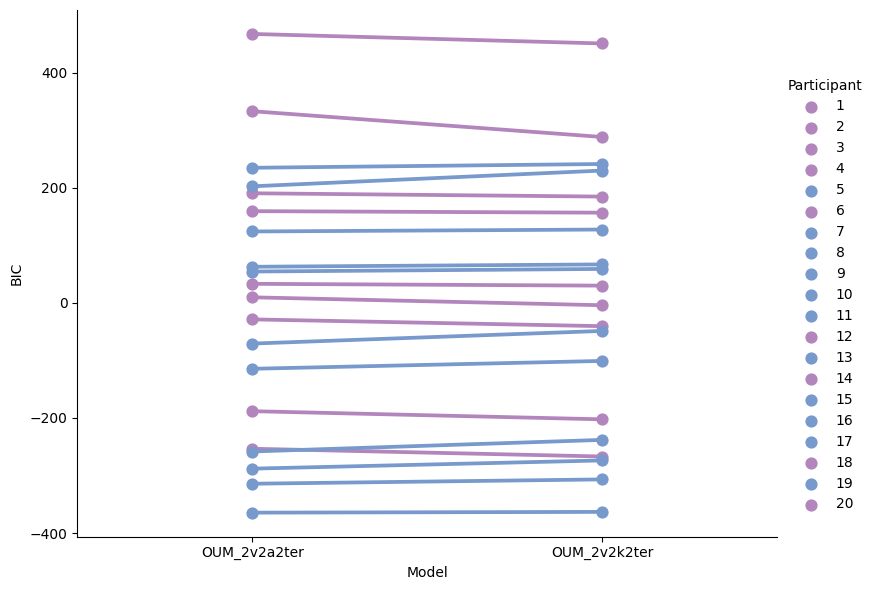

In [119]:
sns.catplot(data=data, x="Model", y="BIC", hue = "Participant", kind="point", palette = change,
            height=6, aspect=8/6)

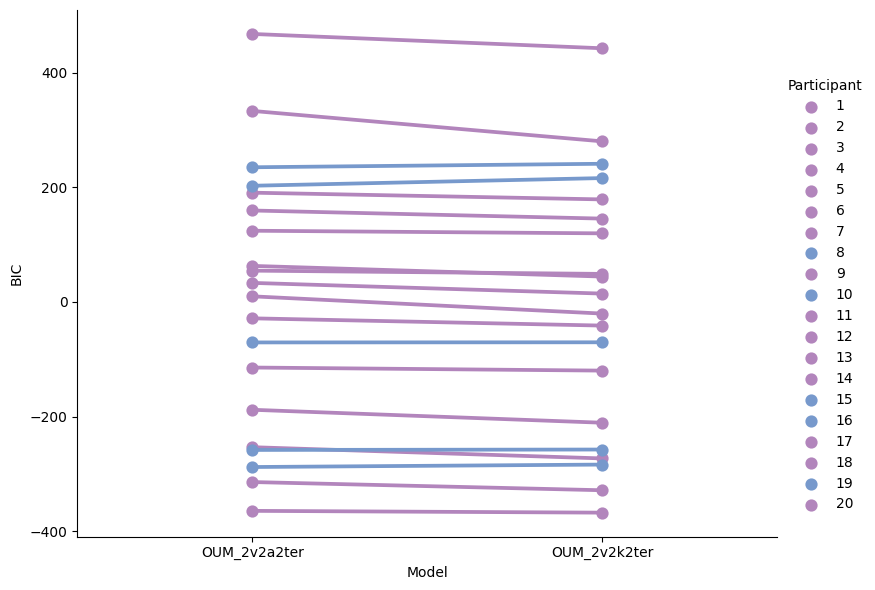

In [33]:
sns.catplot(data=data, x="Model", y="BIC", hue = "Participant", kind="point", palette = change,
            height=6, aspect=8/6)

## Using function to plot

In [2]:


def BIC_to_likelihood(BIC, k, n):
    x = np.exp((-BIC+k*np.log(n))/2)
    if x < np.log(2.2E-308):
        return 2.2E-308
    if x > np.log(1.7E+308):
        return 1.7E+308
    return x

In [2]:
def BIC_to_exp(BIC):
    return np.exp(-BIC/2)
def BIC_to_likelihood(BIC, k, n):
    return np.exp((-BIC+k*np.log(n))/2)

def plot_BIC_comparison(ax,dataset, models, sortby = "OUM2v2k2ter"):
    BIC_all = pd.DataFrame(columns = models)
    for model in models:
        if dataset=="Wagenmakers2008":
            BIC_all[model] = pd.DataFrame(np.array(pd.read_csv(model+"resultWagenmakers2008.csv").astype('float64').groupby('Participant')[['BIC']].mean()), columns = ["BIC"])
            BIC_all[model] = BIC_to_exp(BIC_all[model])
        elif dataset=="Taylor2023exp2":
            BIC_all[model] = pd.DataFrame(np.array(pd.read_csv(model+"resultTaylor2023exp2.csv").astype('float128').groupby('Participant')[['BIC']].mean()), columns = ["BIC"])
            BIC_all[model] = BIC_to_exp(BIC_all[model])
        elif dataset=="Taylor2023exp3":
            BIC_all[model] = pd.read_csv(model+"result"+dataset+".csv").astype('float64')[['BIC']]
            BIC_all[model] = BIC_to_exp(BIC_all[model])
        else:
            if model == "DDM2v1sv2a2ter":
                bic_dir = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/DDM2v1sv2a2ter_"
                BIC_all[model] = pd.read_csv(bic_dir+dataset+".csv").astype('float64')[['BIC']]
                BIC_all[model] = BIC_to_exp(BIC_all[model])
                
            else:
                BIC_all[model] = pd.read_csv(model+"result"+dataset+".csv").astype('float64')[['BIC']]
                BIC_all[model] = BIC_to_exp(BIC_all[model])

    BIC_all["Sum"] = BIC_all.sum(axis = 1)
    
    for model in models:
        BIC_all[model] = BIC_all[model]/BIC_all["Sum"]


    BIC_all = BIC_all.drop(labels = 'Sum',axis = 1)
    BIC_all = BIC_all.sort_values(by = sortby, axis = 0)

    return BIC_all.plot(ax=ax, kind='bar', title = dataset, legend =False, stacked=True)#, color=['steelblue', 'skyblue', 'blue'])


In [11]:
def plot_all_datasets(models, labels, sortby, xlabelsize=15, titlesize = 20, figsize=(18, 12)):
    figure, axes = plt.subplots(2,3,figsize=figsize)
    plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2013", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[0,1],dataset = "Dutilh2019", models = models, sortby = sortby) # float 128 issue
    plot_BIC_comparison(ax = axes[0,2],dataset = "Evans2017", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,0],dataset = "Lerche2017", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,1],dataset = "Rae2014", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models, sortby = sortby) # float 128 issue
    
    axes[0,0].set_title("Dutilh2013",fontsize = titlesize)
    axes[0,1].set_title("Dutilh2019",fontsize = titlesize)
    axes[0,2].set_title("Evans2017",fontsize = titlesize)
    axes[1,0].set_title("Lerche2017",fontsize = titlesize)
    axes[1,1].set_title("Rae2014",fontsize = titlesize)
    axes[1,2].set_title("Wagenmakers2008",fontsize = titlesize)
    axes[1,0].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,1].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,2].set_xlabel("Participants", fontsize = xlabelsize)

    axes[0,2].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1))

FileNotFoundError: [Errno 2] No such file or directory: 'DDM2v1sv2a2terresultWagenmakers2008.csv'

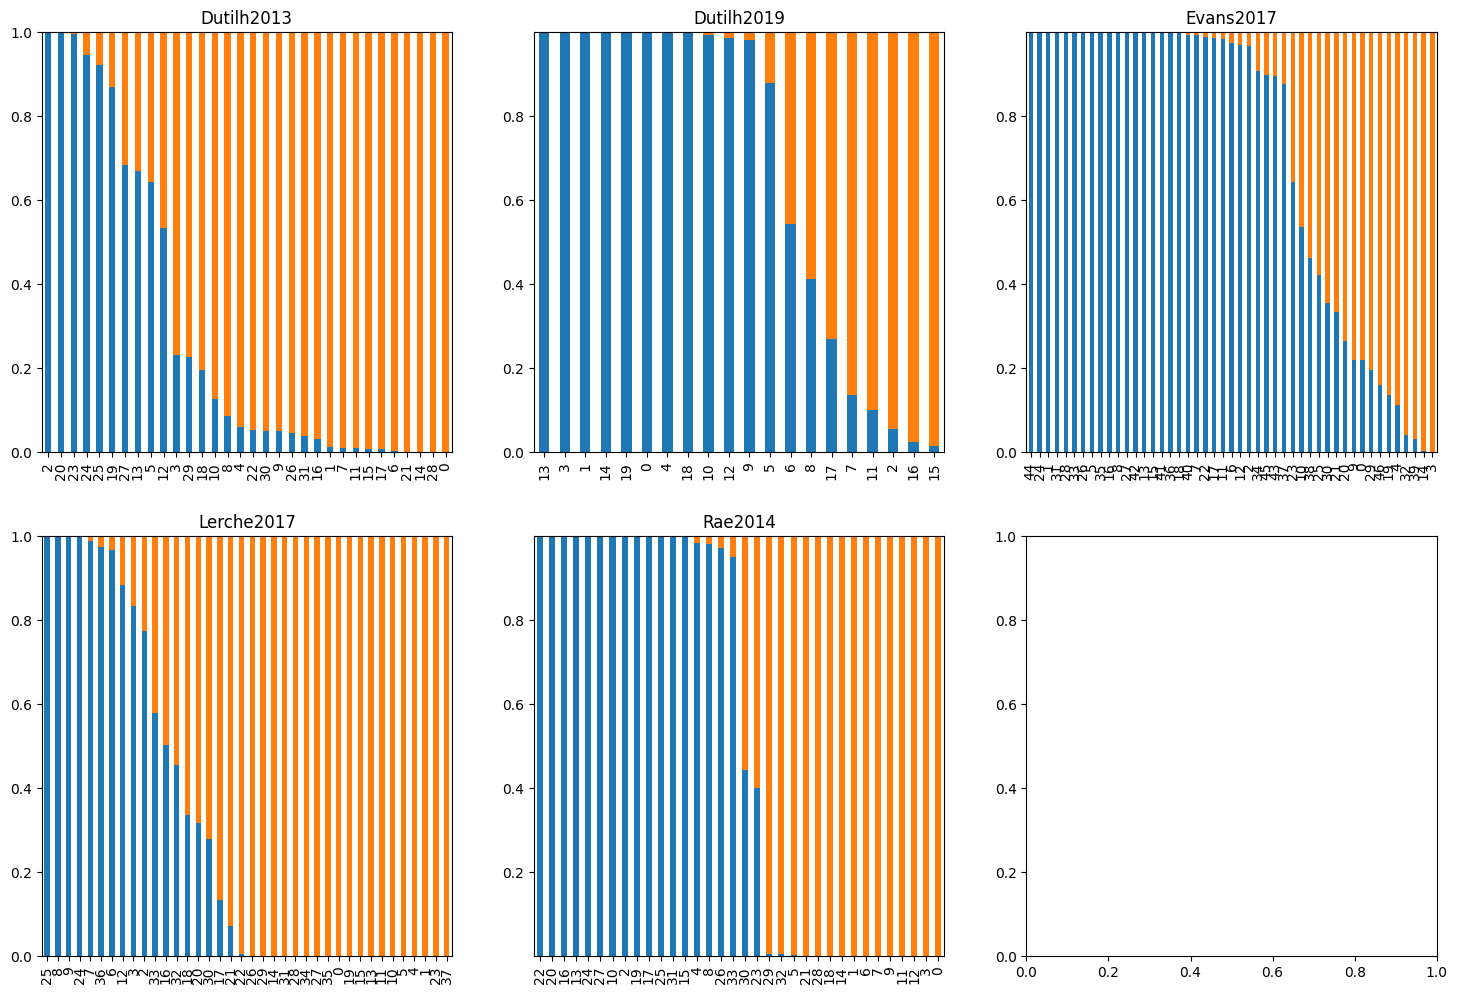

In [13]:
models = ["DDM2v1sv2a2ter","DDM2v2a2ter"] 
labels = ["DDM2v1sv2a2ter","DDM2v2a2ter"] 
sortby = "DDM2v2a2ter"
plot_all_datasets(models, labels, sortby = "DDM2v2a2ter")

FileNotFoundError: [Errno 2] No such file or directory: 'DDMfullresultWagenmakers2008.csv'

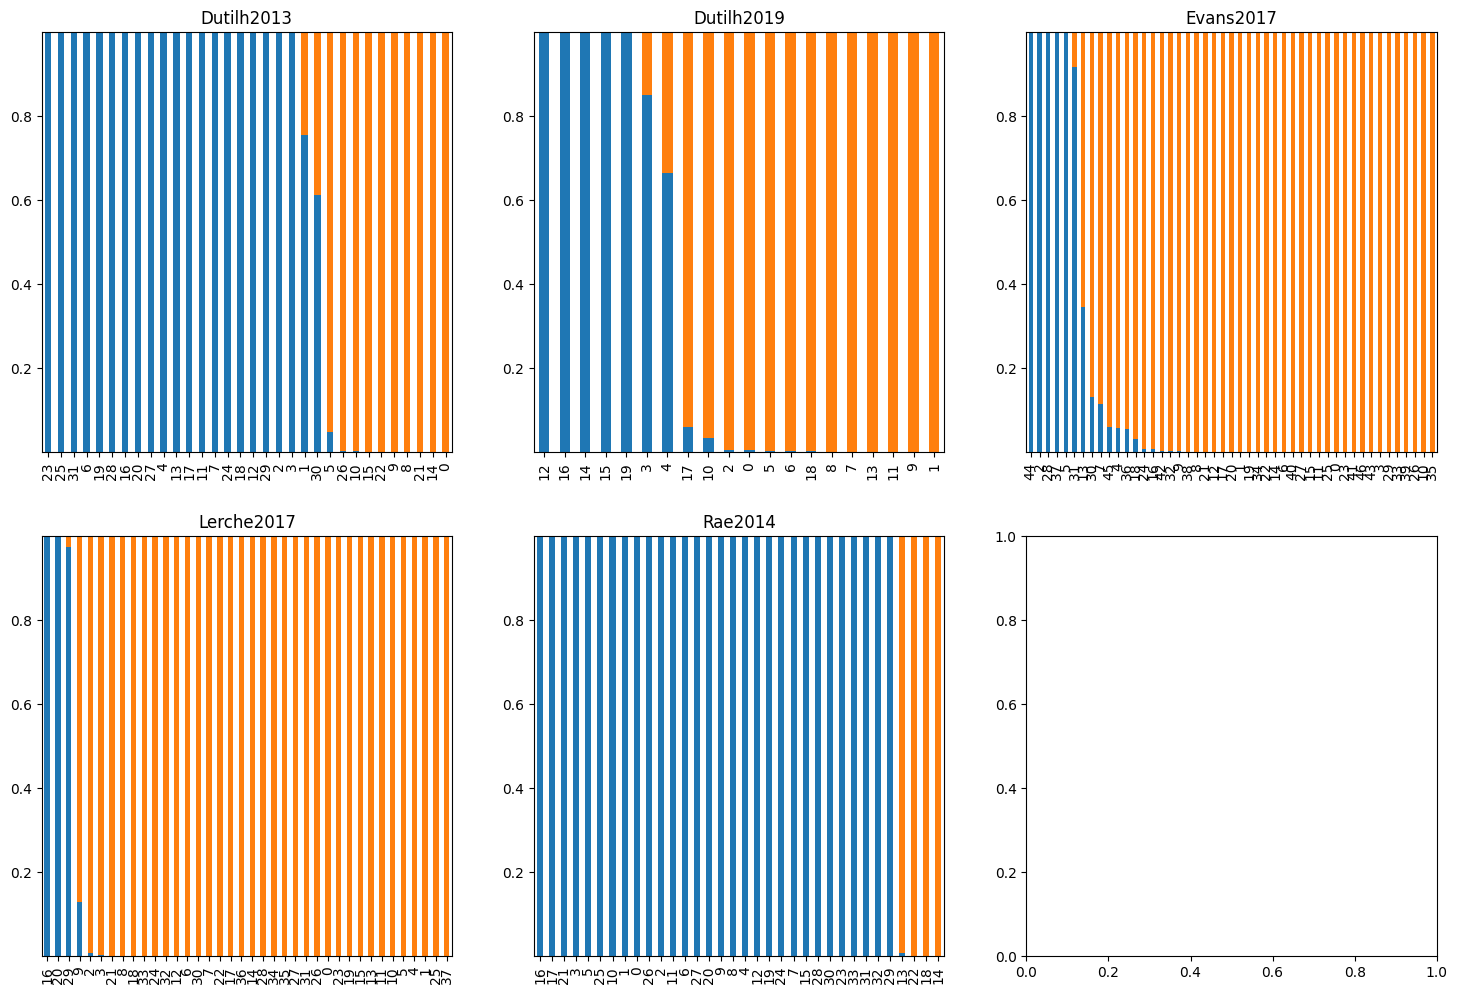

In [22]:
models = ["DDMfull","OUM2v2k2ter"] 
labels = ["DDMfull","OUM2v2k2ter"] 
sortby = "OUM2v2k2ter"
plot_all_datasets(models, labels, sortby = "OUM2v2k2ter")

In [25]:
(87/90)**(-20)

1.9699950568107494

FileNotFoundError: [Errno 2] No such file or directory: 'DDM2v1sv2a2terresultWagenmakers2008.csv'

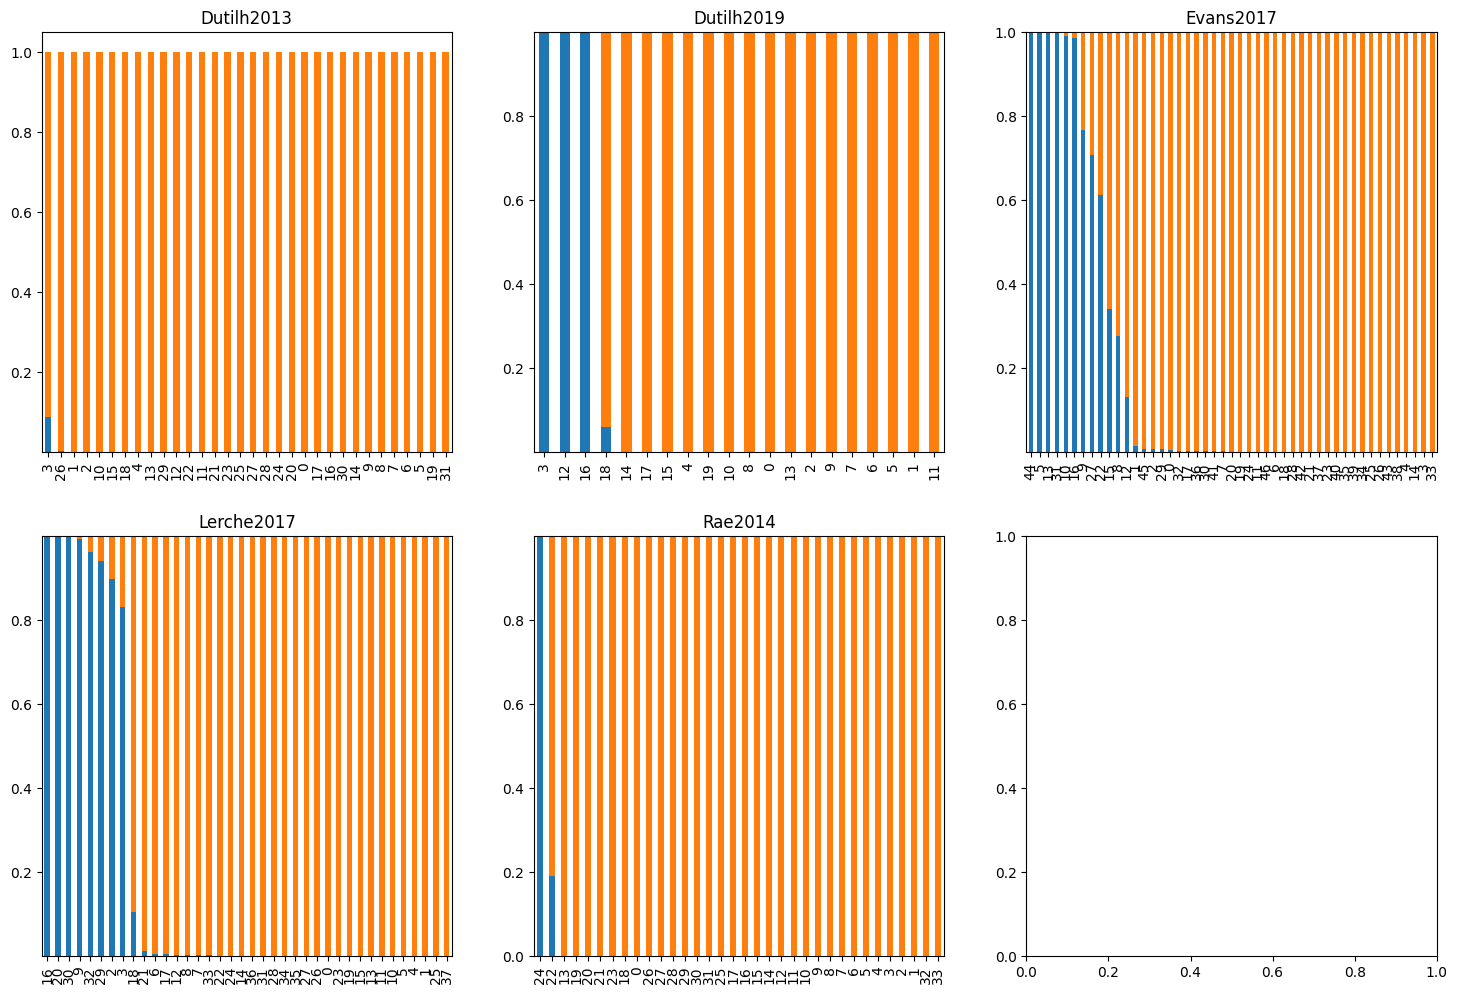

In [33]:
models = ["DDM2v1sv2a2ter","OUM2v2k2ter"] 
labels = ["DDM2v1sv2a2ter","OUM2v2k2ter"] 
sortby = "OUM2v2k2ter"
plot_all_datasets(models, labels, sortby = "OUM2v2k2ter")

<Axes: title={'center': 'Dutilh2013'}>

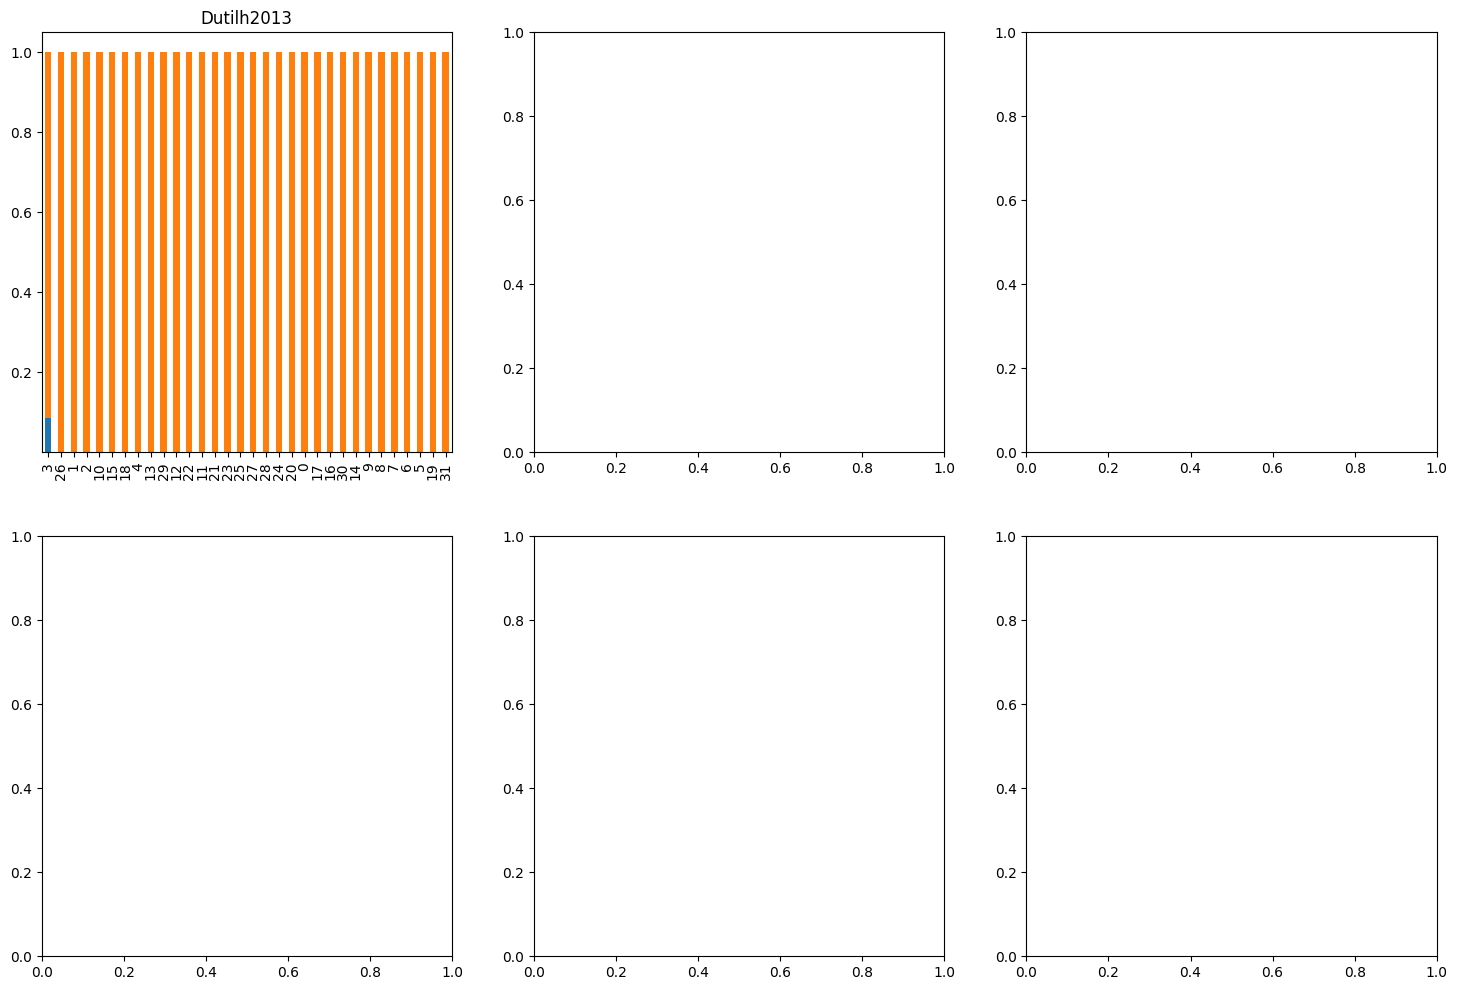

In [8]:
figsize=(18, 12)
figure, axes = plt.subplots(2,3,figsize=figsize)
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2013", models = models, sortby = sortby)

In [4]:
def constrain_range(BIC):
    for i in range(len(BIC)):
        if BIC[i] > -np.log(2.2E-308)/2:
            BIC[i] = 1.7E+307
        elif BIC[i] < -np.log(1.7E+308)/2:
            BIC[i] = 2.2E-307
        return BIC

In [17]:
#dataset = "Dutilh2019"
#models = ["DDM2v2c2ter","OUM2v2k2ter"] 
#sortby = "OUM2v2k2ter"
def plot_BIC_comparison(ax,dataset, models, sortby = "OUM2v2k2ter"):

    BIC_all = pd.DataFrame(columns = models)
    for model in models:
        if dataset=="Wagenmakers2008":
            BIC_all[model] = pd.DataFrame(np.array(pd.read_csv(model+"resultWagenmakers2008.csv").groupby('Participant')[['BIC']].mean()), columns = ["BIC"])
        else:
            if model == "DDM2v1sv2a2ter" or model == "DDMfull":
                bic_dir = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/"+model+"_"
                BIC_all[model] = pd.read_csv(bic_dir+dataset+".csv").astype('float64')[['BIC']]                
            else:
                BIC_all[model] = pd.read_csv(model+"result"+dataset+".csv").astype('float64')[['BIC']]
    # solving the numerical issue
    for i in range(len(BIC_all)):
        tmp_max = np.max(np.array(BIC_all.loc[[i]]))
        tmp_min = np.min(np.array(BIC_all.loc[[i]]))
        np_max = -np.log(2.2E-308)/2 # 354
        np_min = -np.log(1.7E+308)/2 # -354

        if tmp_max > np_max and tmp_min < np_min:
            for model in models:
                if BIC_all.loc[i,model] > np_max:
                    BIC_all.loc[i,model] = np_max
                if BIC_all.loc[i,model] < np_min:
                    BIC_all.loc[i,model] = np_min

        elif tmp_max > np_max and tmp_min > np_min:
            dif_max = tmp_max-np_max
            BIC_all.loc[[i]] -= dif_max
        elif tmp_min < np_min and tmp_max < np_max:
            dif_min = tmp_min - np_min
            BIC_all.loc[[i]] -= dif_min



    for model in models:
        BIC_all[model] = BIC_to_exp(BIC_all[model])

    BIC_all["Sum"] = BIC_all.sum(axis = 1)

    for model in models:
        BIC_all[model] = BIC_all[model]/BIC_all["Sum"]

    BIC_all = BIC_all.drop(labels = 'Sum',axis = 1)
    BIC_all = BIC_all.sort_values(by = sortby, axis = 0)

    return BIC_all.plot(ax = ax, kind='bar', title = dataset, legend =False, stacked=True)

In [ ]:
pd.DataFrame(np.array(pd.read_csv(model+"resultWagenmakers2008.csv").groupby('Participant')[['BIC']].mean()), columns = ["BIC"])

In [38]:
def plot_all_datasets(models, labels, sortby, xlabelsize=15, titlesize = 20, figsize=(18, 12)):
    figure, axes = plt.subplots(2,3,figsize=figsize)
    plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2013", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[0,1],dataset = "Dutilh2019", models = models, sortby = sortby) # float 128 issue
    plot_BIC_comparison(ax = axes[0,2],dataset = "Evans2017", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,0],dataset = "Lerche2017", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,1],dataset = "Rae2014", models = models, sortby = sortby)
    plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models, sortby = sortby) # float 128 issue
    
    axes[0,0].set_title("Dutilh2013",fontsize = titlesize)
    axes[0,1].set_title("Dutilh2019",fontsize = titlesize)
    axes[0,2].set_title("Evans2017",fontsize = titlesize)
    axes[1,0].set_title("Lerche2017",fontsize = titlesize)
    axes[1,1].set_title("Rae2014",fontsize = titlesize)
    axes[1,2].set_title("Wagenmakers2008",fontsize = titlesize)
    axes[1,0].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,1].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,2].set_xlabel("Participants", fontsize = xlabelsize)

    axes[0,2].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1))

In [59]:
def plot_one_datasets(models, labels, sortby, ):
    figure, axes = plt.subplots(2,3,figsize=figsize)
    plot_BIC_comparison(ax = axes[0,0],dataset = "crossfitting", models = models, sortby = sortby)
   
    axes[0,0].set_title("Dutilh2013",fontsize = titlesize)
    axes[0,1].set_title("Dutilh2019",fontsize = titlesize)
    axes[0,2].set_title("Evans2017",fontsize = titlesize)
    axes[1,0].set_title("Lerche2017",fontsize = titlesize)
    axes[1,1].set_title("Rae2014",fontsize = titlesize)
    axes[1,2].set_title("Wagenmakers2008",fontsize = titlesize)
    axes[1,0].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,1].set_xlabel("Participants", fontsize = xlabelsize)
    axes[1,2].set_xlabel("Participants", fontsize = xlabelsize)

    axes[0,0].legend(labels = labels)

Text(0.5, 1.0, 'Fit OUM to DDM Data')

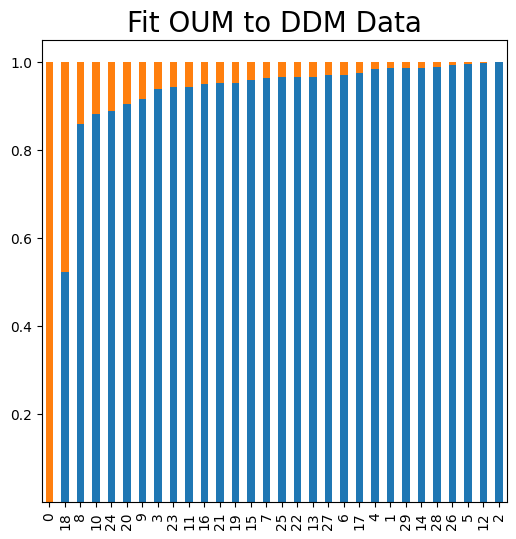

In [67]:
xlabelsize=15
titlesize = 20
figsize=(6, 6)
figure, axes = plt.subplots(1,1,figsize=figsize)

models = ["DDM","OUM"] 
models = ["DDM","OUM"] 
sortby = "DDM"
plot_BIC_comparison(ax = axes,dataset = "crossfitting", models = models, sortby = sortby)
axes.set_title("Fit OUM to DDM Data",fontsize = titlesize)

#plot_one_datasets(models, labels, sortby)

In [ ]:
models = ["OUM2a2ter", "OUM2v2a2ter","OUM2k2ter","OUM2v2k2ter"] 
color = ['#1f77b4', '#1f77b4', '#ff7f0e','#ff7f0e']

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison_merge(ax = axes[0,0],dataset = "Dutilh2019", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[0,1],dataset = "Rae2014", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[0,2],dataset = "Lerche2017", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[1,0],dataset = "Dutilh2013", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[1,1],dataset = "Evans2017", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[1,2],dataset = "Wagenmakers2008", models = models, color=color)
axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



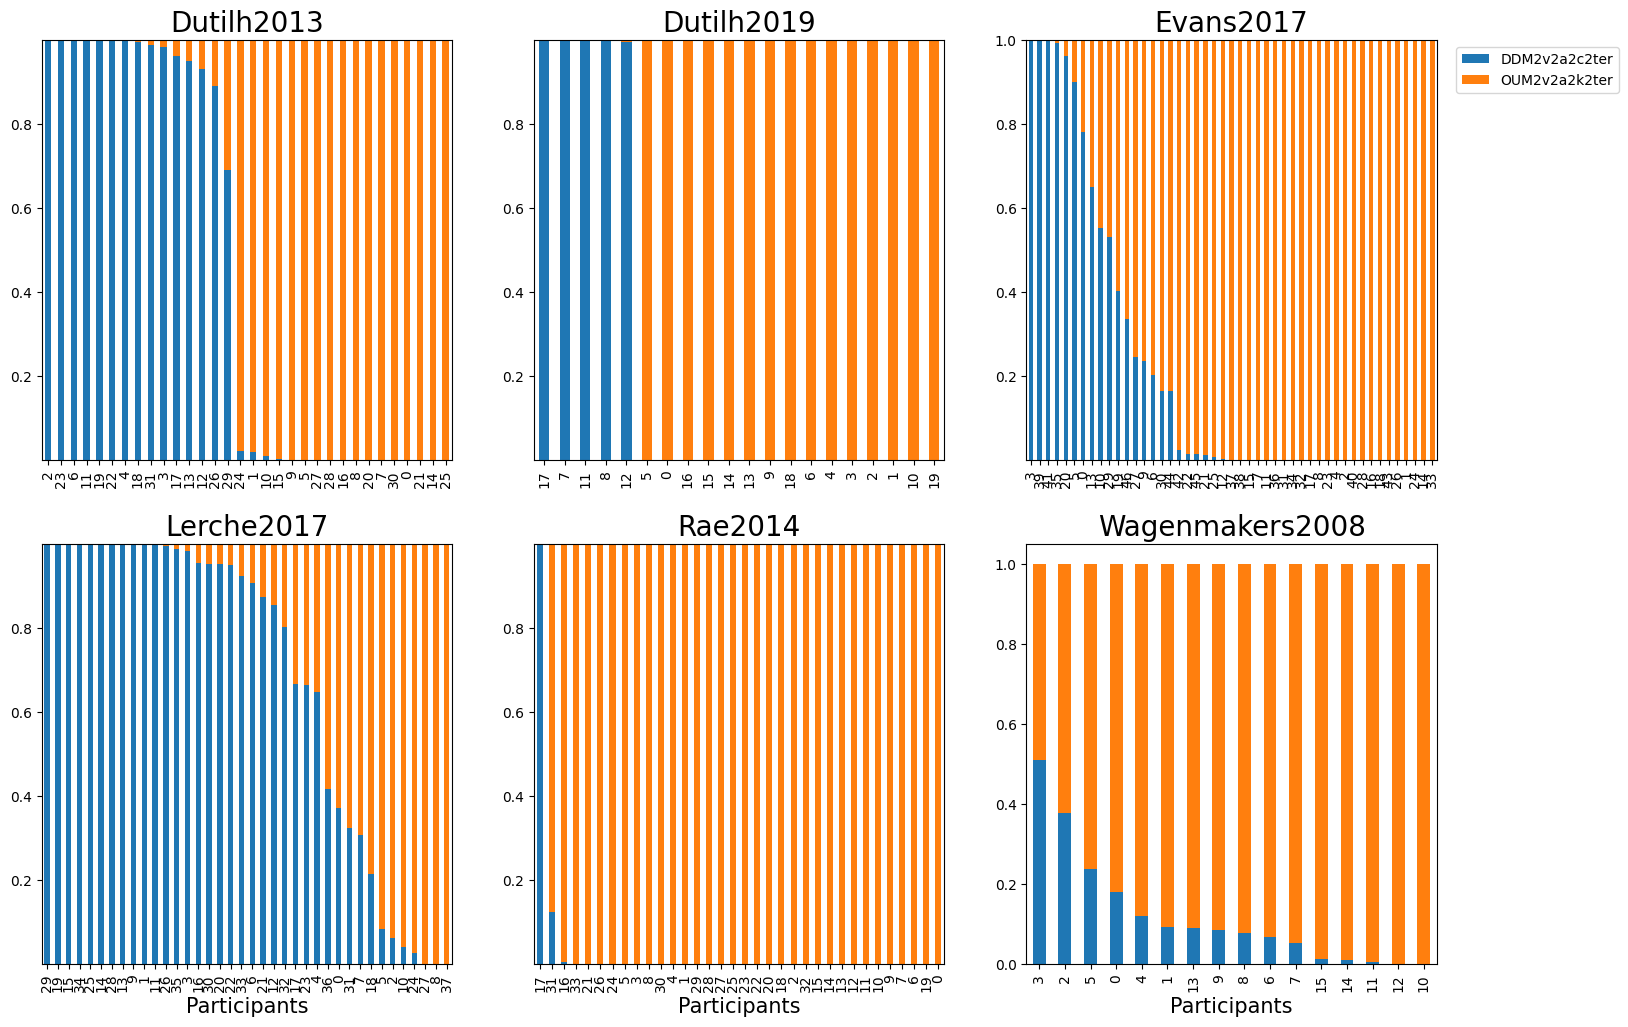

In [26]:
models = ["DDM2v2a2c2ter","OUMfull"] 
labels = ["DDM2v2a2c2ter","OUM2v2a2k2ter"] 
sortby = "OUMfull"
plot_all_datasets(models, labels, sortby)

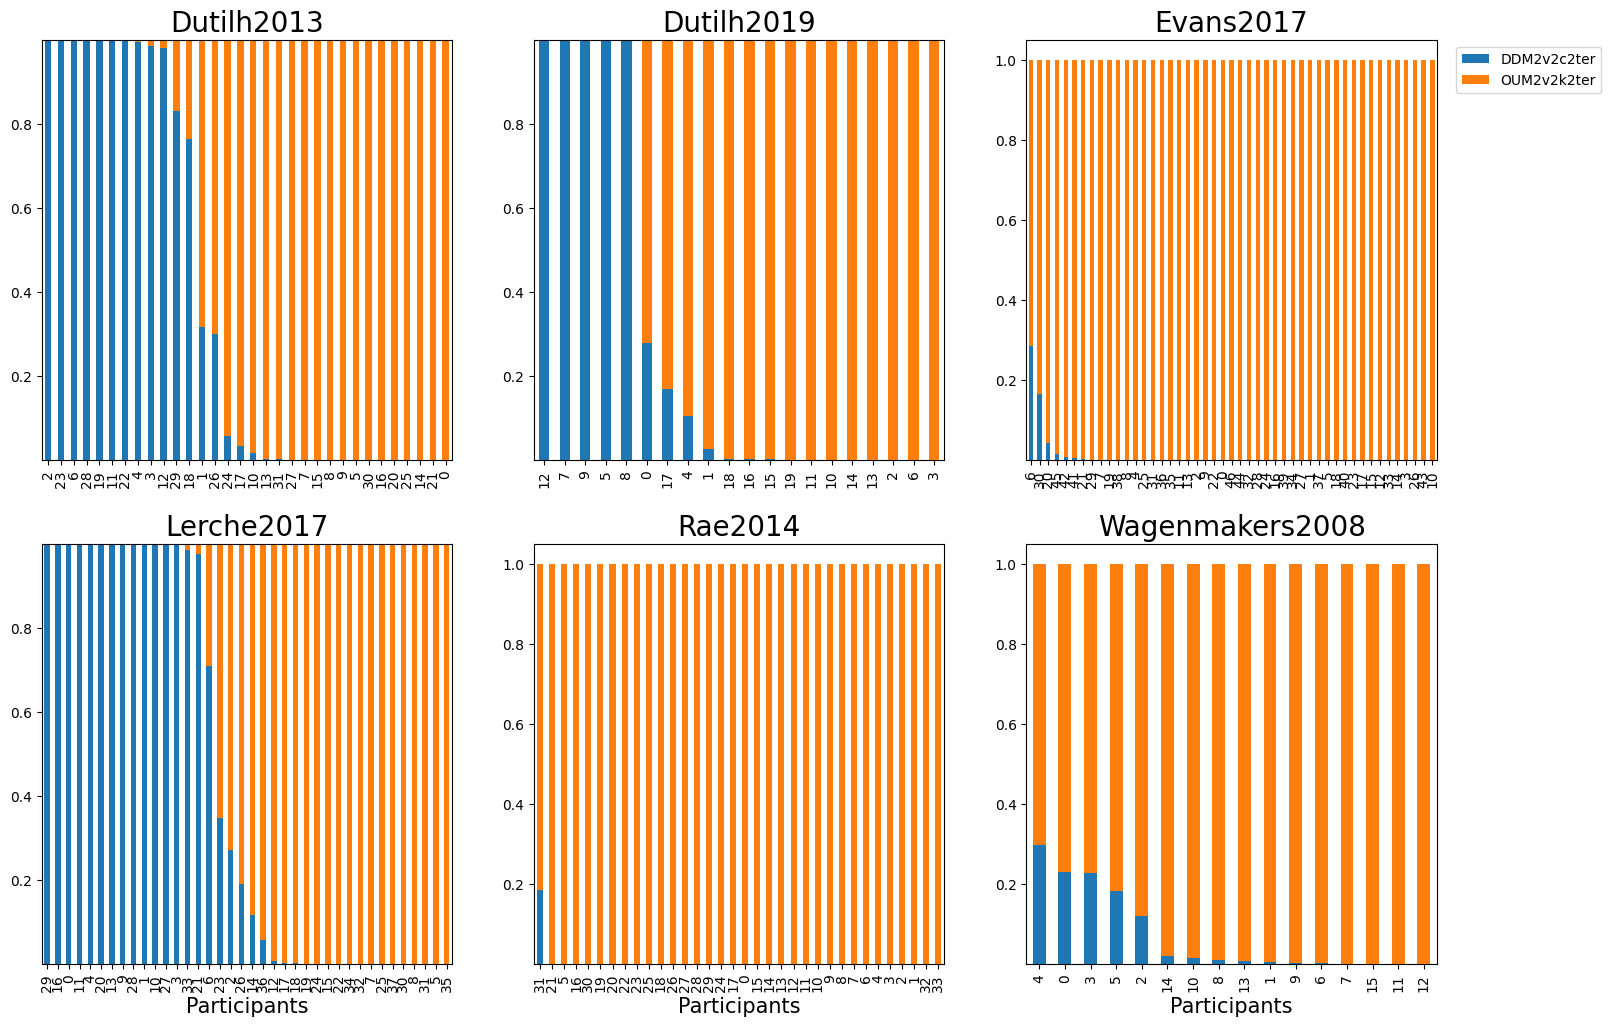

In [42]:
models = ["DDM2v2c2ter","OUM2v2k2ter"] 
sortby = "OUM2v2k2ter"
plot_all_datasets(models, models, sortby)

TypeError: Axes.set_title() missing 1 required positional argument: 'label'

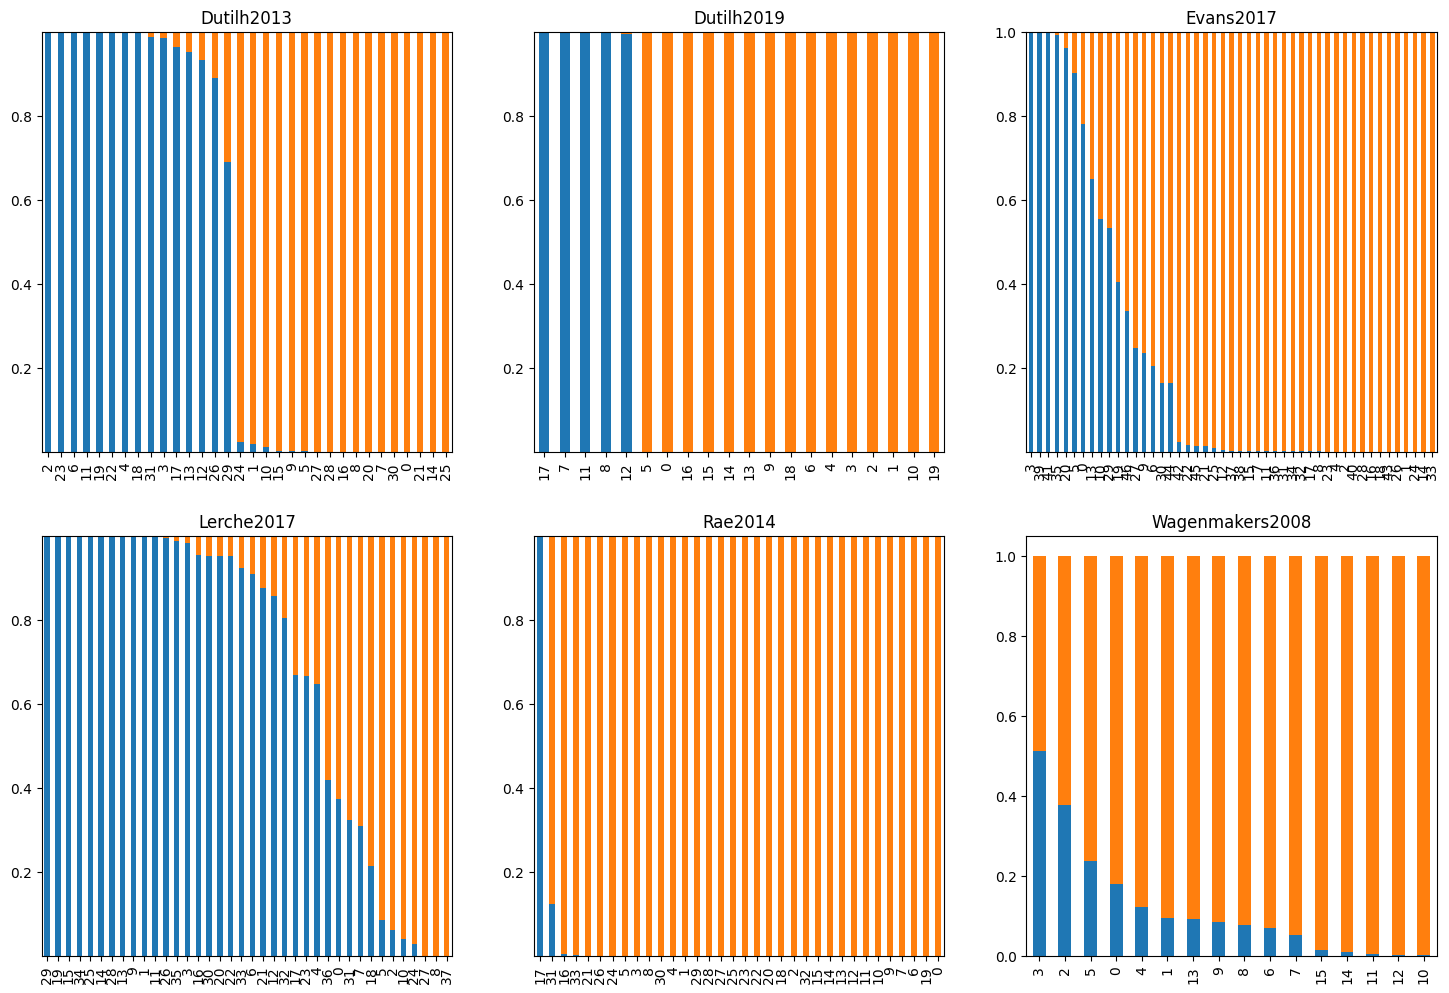

In [22]:
models = ["DDM2v2c2ter","OUM2v2k2ter"] 
sortby = "OUM2v2k2ter"
figure, axes = plt.subplots(2,3,figsize=figsize)
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2013", models = models, sortby = sortby)
plot_BIC_comparison(ax = axes[0,1],dataset = "Dutilh2019", models = models, sortby = sortby) # float 128 issue
plot_BIC_comparison(ax = axes[0,2],dataset = "Evans2017", models = models, sortby = sortby)
plot_BIC_comparison(ax = axes[1,0],dataset = "Lerche2017", models = models, sortby = sortby)
plot_BIC_comparison(ax = axes[1,1],dataset = "Rae2014", models = models, sortby = sortby)
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models, sortby = sortby) # float 128 issue

axes[0,0].set_title("ReLU Function",fontsize = 40)
axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))

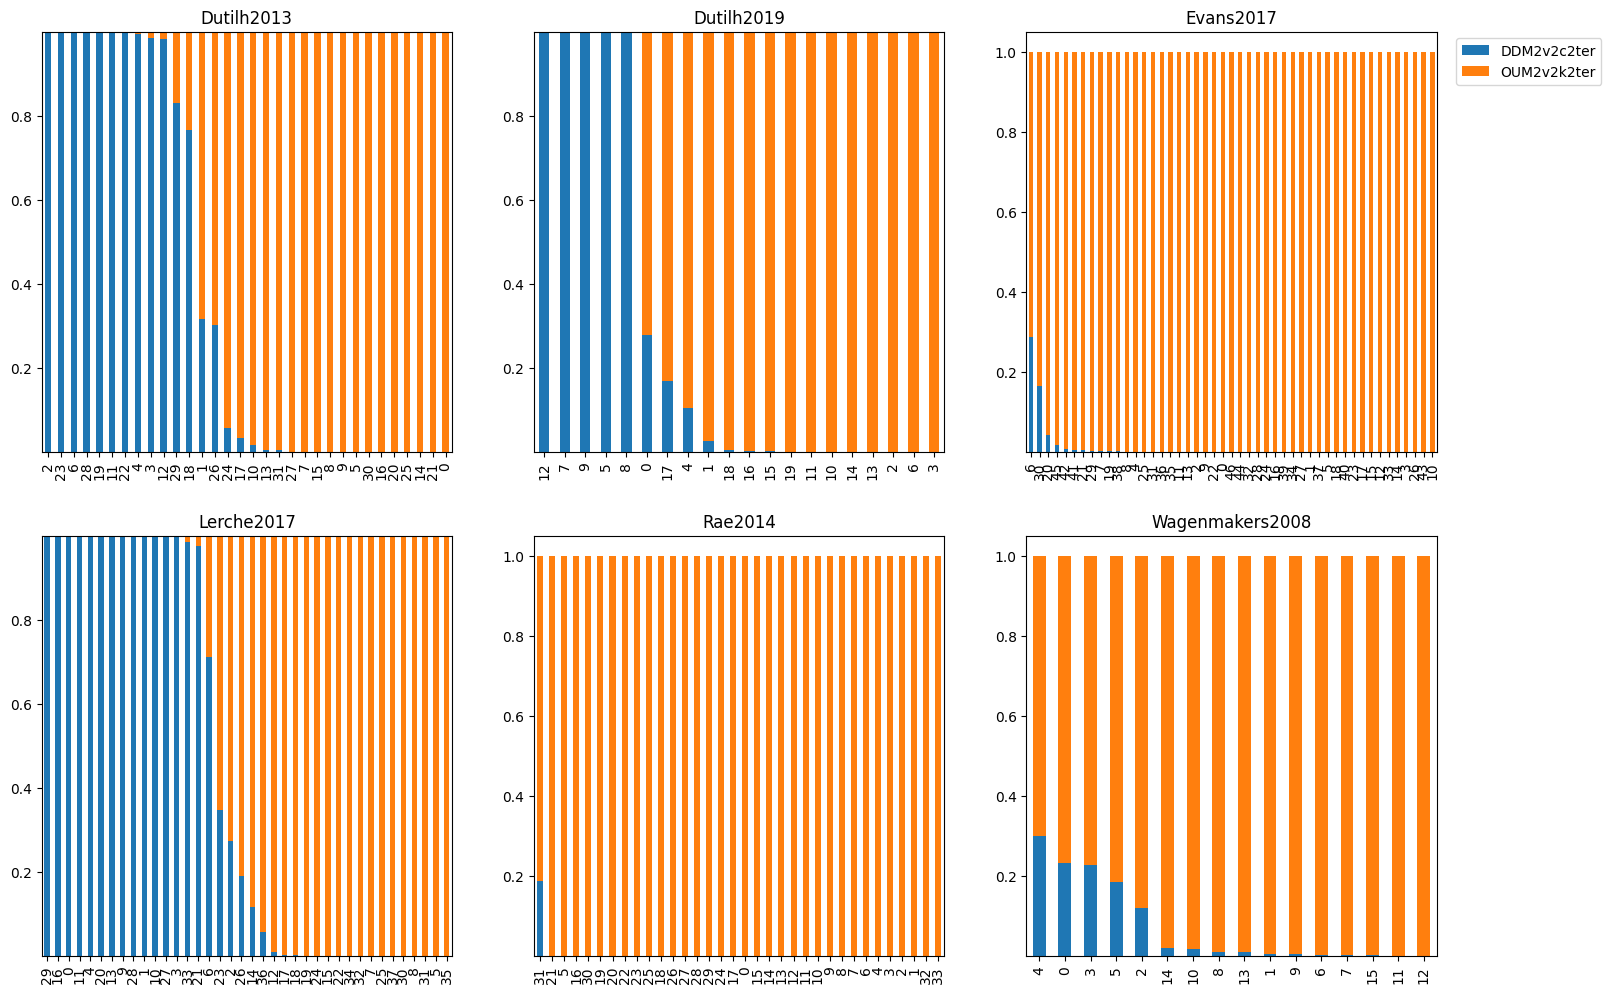

In [15]:
models = ["DDM2v2c2ter","OUM2v2k2ter"] 
sortby = "OUM2v2k2ter"

figure, axes = plt.subplots(2,3,figsize=(18, 12))

plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2013", models = models, sortby = sortby)
plot_BIC_comparison(ax = axes[0,1],dataset = "Dutilh2019", models = models, sortby = sortby) # float 128 issue
plot_BIC_comparison(ax = axes[0,2],dataset = "Evans2017", models = models, sortby = sortby)
plot_BIC_comparison(ax = axes[1,0],dataset = "Lerche2017", models = models, sortby = sortby)
plot_BIC_comparison(ax = axes[1,1],dataset = "Rae2014", models = models, sortby = sortby)
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models, sortby = sortby) # float 128 issue

axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))

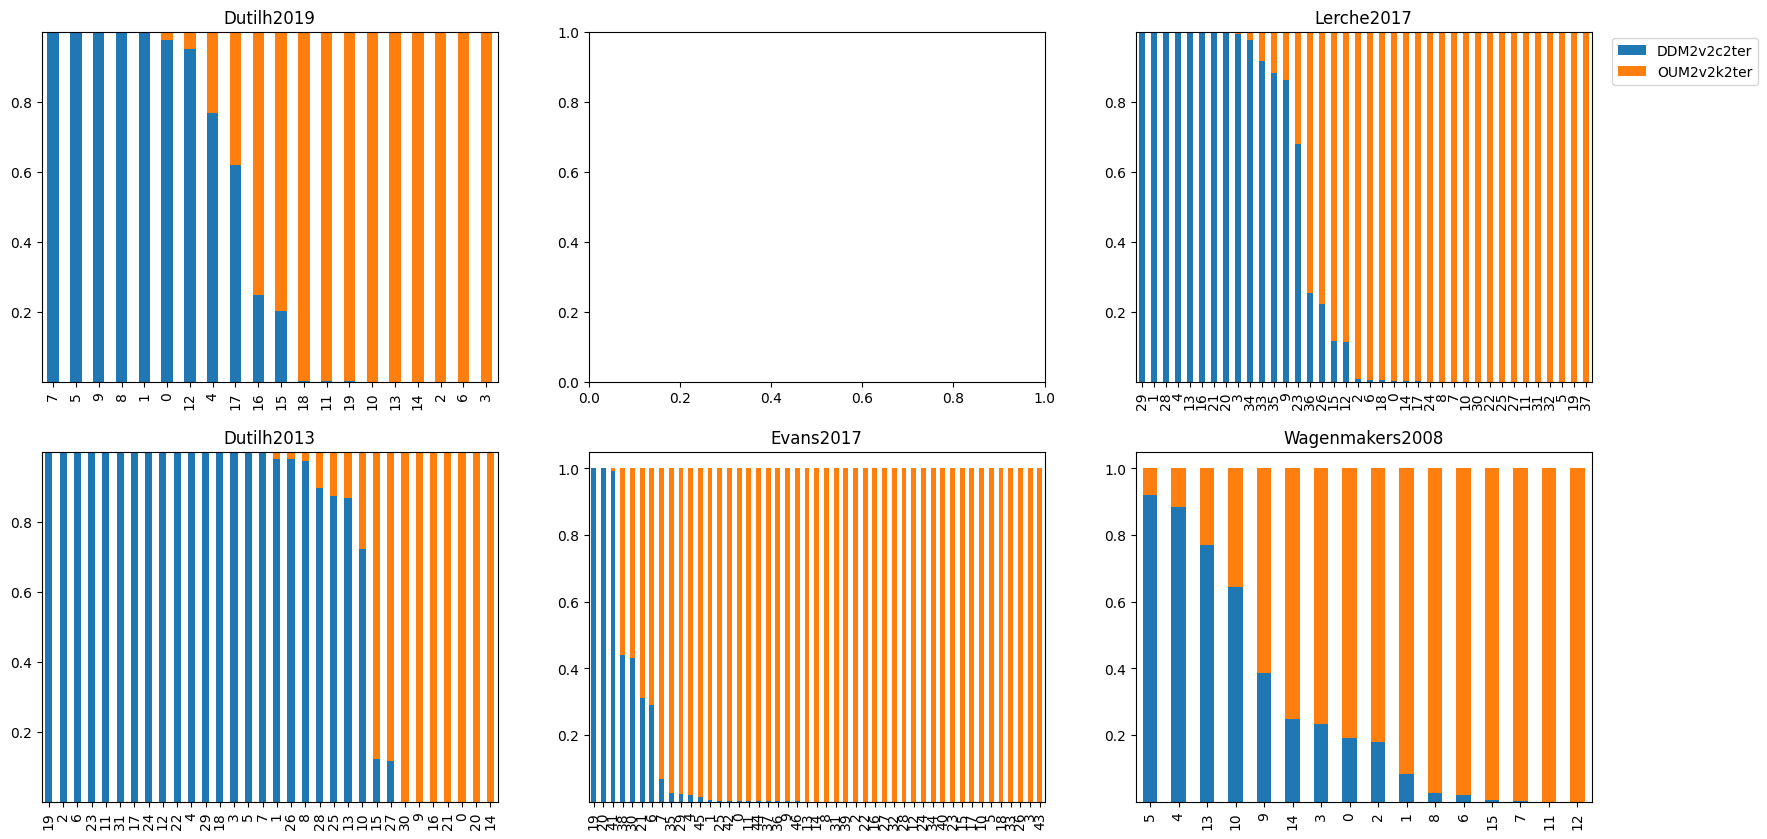

In [244]:
models = ["DDM2v2c2ter","OUM2v2k2ter"] 

#models = ["DDM2v2a2ter","OUM2v2k2ter","DDM2b2c2ter", "DDM2v2b2c2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))


plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models)
#plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models, sortby = "OUM2v2k2ter") # float 128 issue
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models, sortby = "OUM2v2k2ter")

plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models)
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models)
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models) # float 128 issue

axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



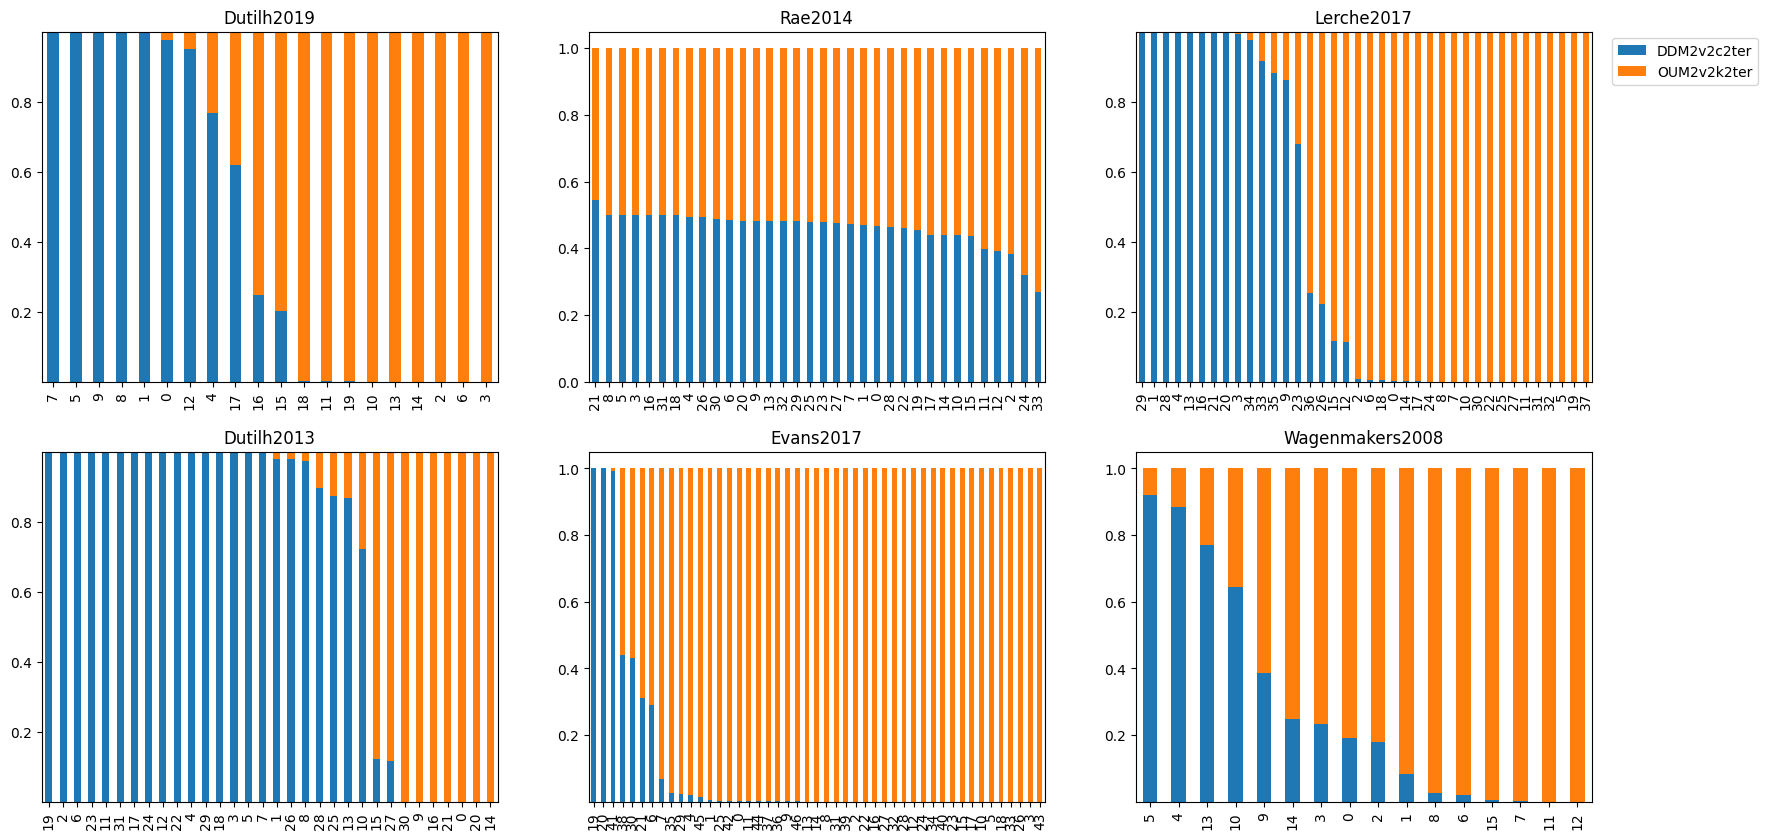

In [239]:
models = ["DDM2v2c2ter","OUM2v2k2ter"] 

#models = ["DDM2v2a2ter","OUM2v2k2ter","DDM2b2c2ter", "DDM2v2b2c2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))


plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models)
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models, sortby = "OUM2v2k2ter") # float 128 issue
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models, sortby = "OUM2v2k2ter")

plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models)
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models)
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models) # float 128 issue

axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



In [ ]:
def nonlinear(x):
    return

In [250]:
x = pd.read_csv("DDM2v2c2terresultRae2014.csv")['BIC']
y = pd.read_csv("OUM2v2k2terresultRae2014.csv")[['BIC']]
print(x)
print(y)

#x -596.610063
#y -774.609398

0     -776.609699
1    -1836.502499
2      190.270434
3    -3756.941004
4     -144.167061
5    -1725.871190
6    -2613.325607
7    -1639.576997
8    -1331.668936
9    -1804.003905
10    -136.636751
11     209.718851
12     144.731092
13    -205.740358
14    -883.335916
15     371.419119
16   -1427.818725
17     596.062792
18   -2594.414877
19    -806.294098
20    -542.854248
21     706.827331
22    -534.120342
23      69.423193
24     748.310841
25    -544.545502
26    -662.046368
27    -837.853890
28     121.064759
29     321.533249
30     -72.462193
31     -40.010114
32     321.774098
33     830.922396
Name: BIC, dtype: float64
            BIC
0  -1020.149987
1  -2196.680000
2   -303.523646
3  -3762.644849
4   -176.622314
5  -1719.883592
6  -2865.794741
7  -1942.955499
8  -1326.343138
9  -2019.466865
10  -444.083839
11  -198.494760
12  -336.320064
13  -299.896037
14 -1392.174135
15   186.000294
16 -1434.426201
17   487.412183
18 -2619.082437
19 -1158.409270
20  -653.949367
21   756.1

In [95]:
#pd.read_csv("DDM2v2c2terresultRae2014.csv")[['BIC']]

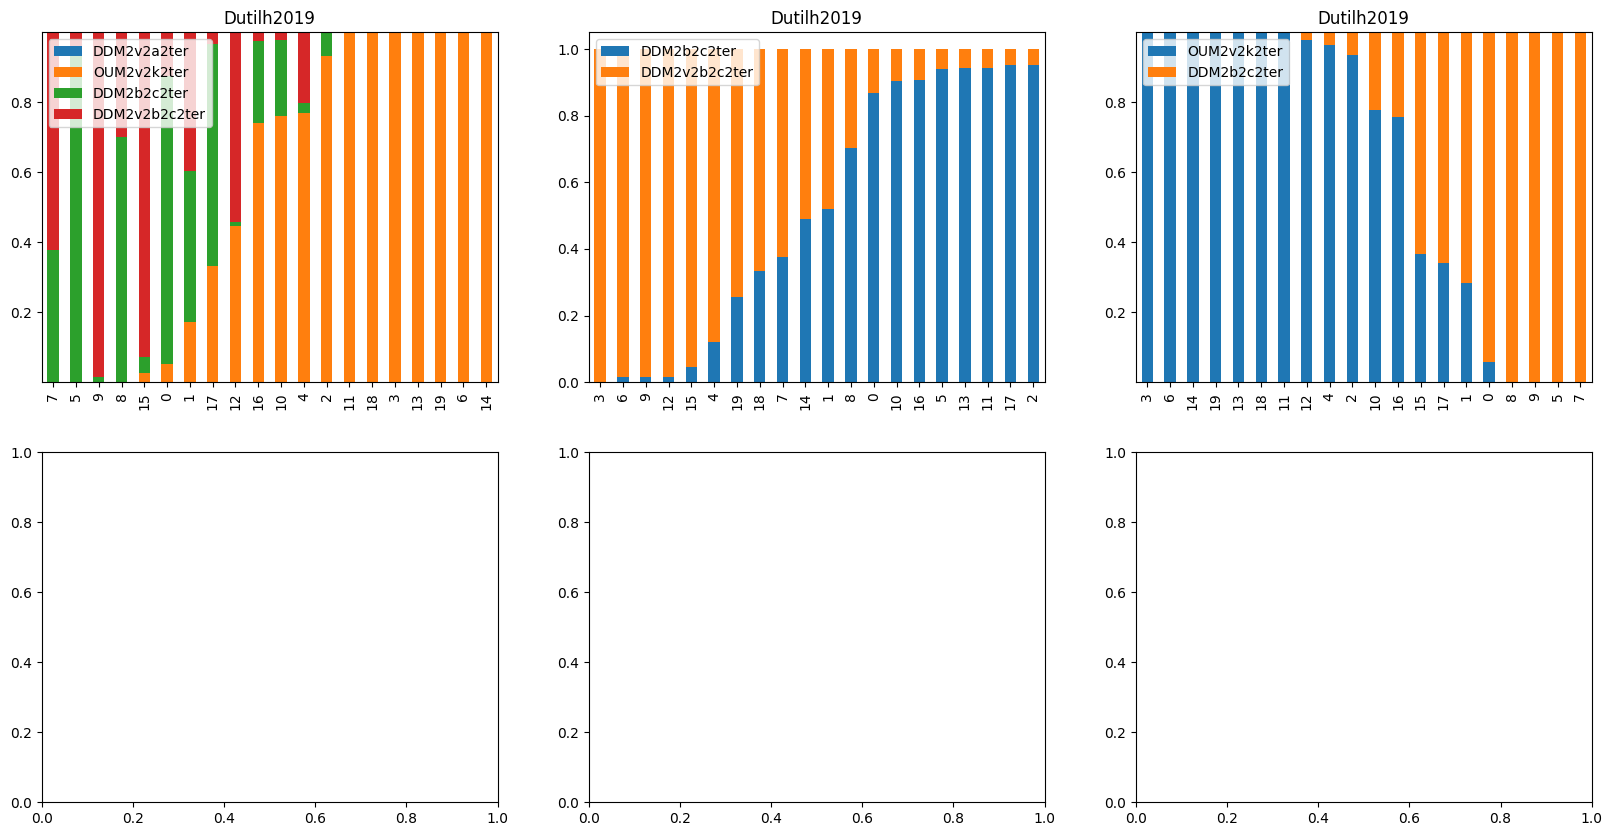

In [159]:
models1 = ["DDM2v2a2ter","OUM2v2k2ter","DDM2b2c2ter", "DDM2v2b2c2ter"] 
models2 = ["DDM2b2c2ter", "DDM2v2b2c2ter"] 
models3 = ["OUM2v2k2ter","DDM2b2c2ter"] 
#models = ["DDM2v2a2ter","OUM2v2k2ter","DDM2b2c2ter", "DDM2v2b2c2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))


plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models1)
axes[0,0].legend(loc='upper left')

plot_BIC_comparison(ax = axes[0,1],dataset = "Dutilh2019", models = models2, sortby = "DDM2b2c2ter")
axes[0,1].legend(loc='upper left')

plot_BIC_comparison(ax = axes[0,2],dataset = "Dutilh2019", models = models3, sortby = "DDM2b2c2ter")
axes[0,2].legend(loc='upper left')

#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models)


#plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models)
#plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models)
#plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models)
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models)

#axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



TypeError: data type 'float128' not understood

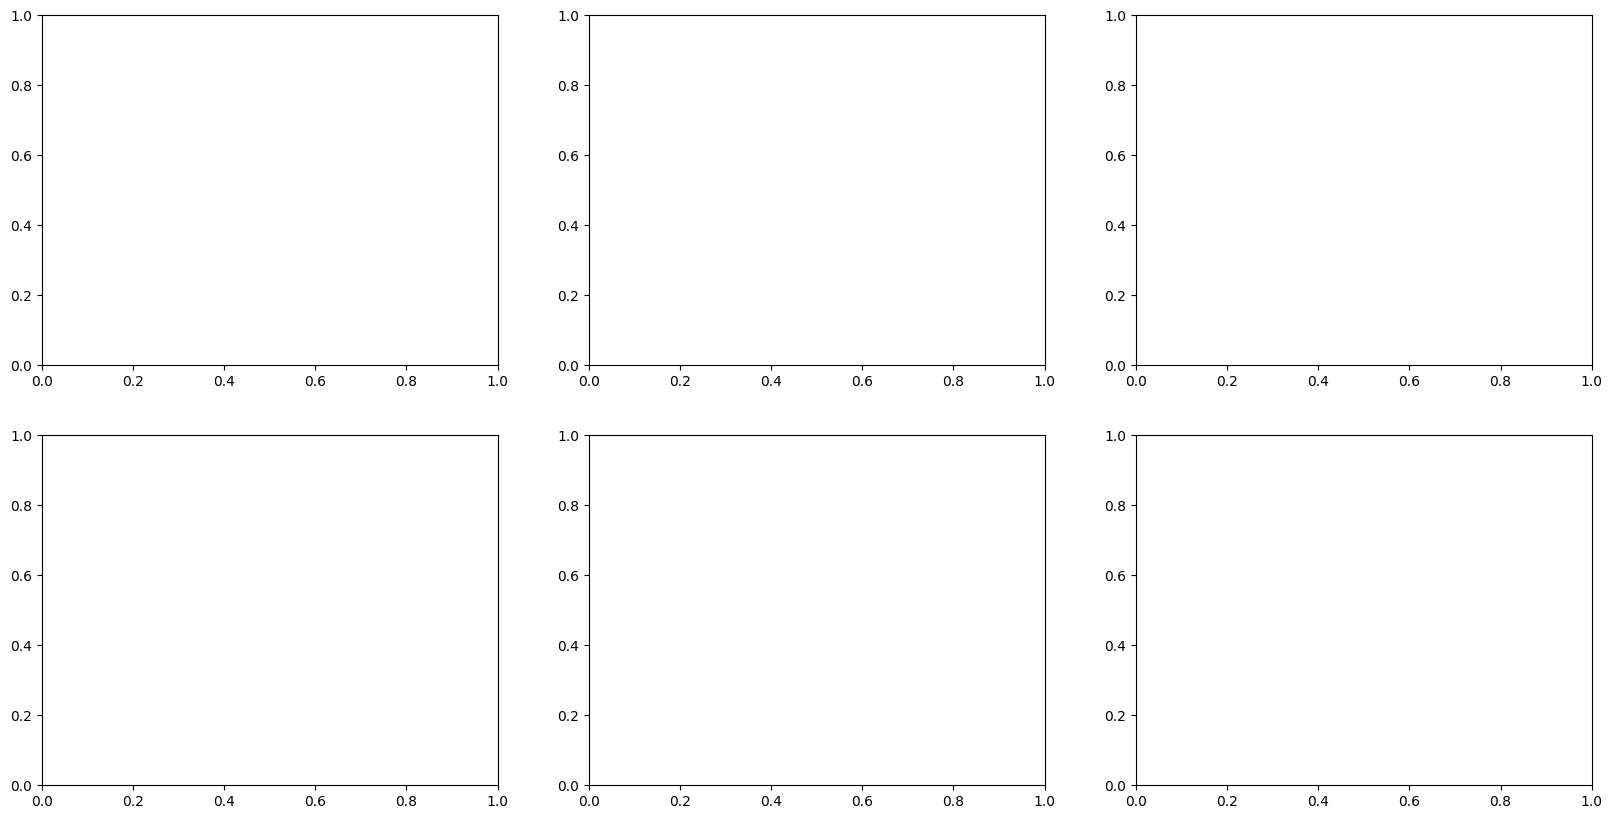

In [5]:
models = ["DDM2a2ter","DDM2v2a2ter",
          "OUM2a2ter","OUM2k2ter","OUM2v2a2ter","OUM2v2k2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models)
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models)
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models)
#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models)


plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models)
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models)
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models)
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models)

axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



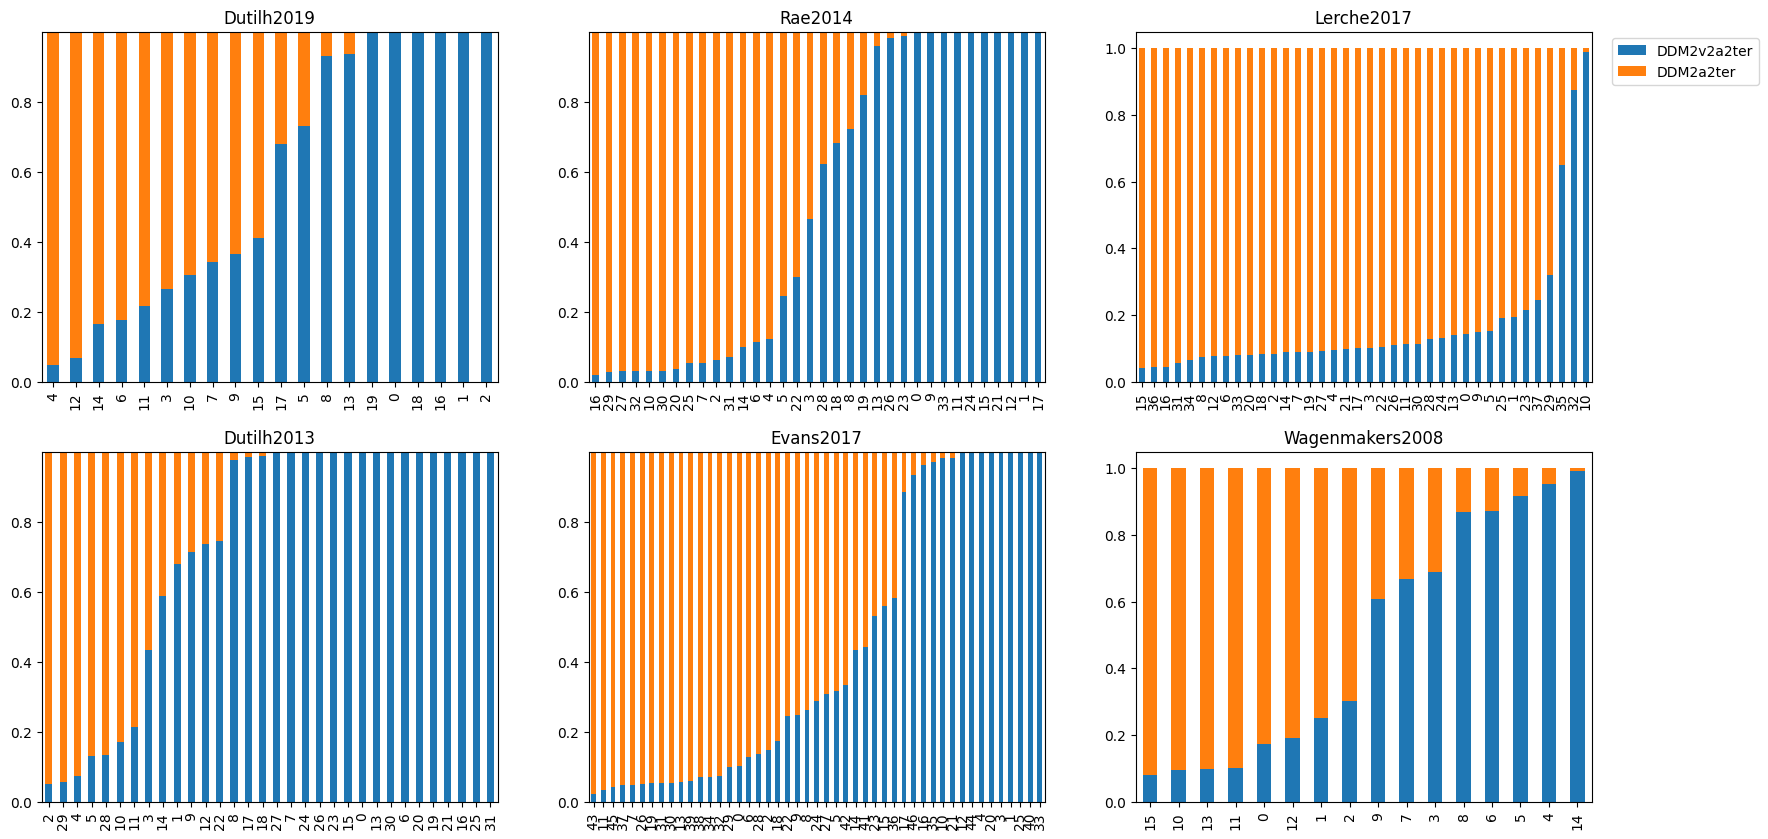

In [17]:
models = ["DDM2v2a2ter","DDM2a2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models,sortby="DDM2v2a2ter")
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models,sortby="DDM2v2a2ter")
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models,sortby="DDM2v2a2ter")
#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models,sortby="OUM2v2a2ter")


plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models,sortby="DDM2v2a2ter")
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models,sortby="DDM2v2a2ter")
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models,sortby="DDM2v2a2ter")
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models,sortby="OUM2v2a2ter")

axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



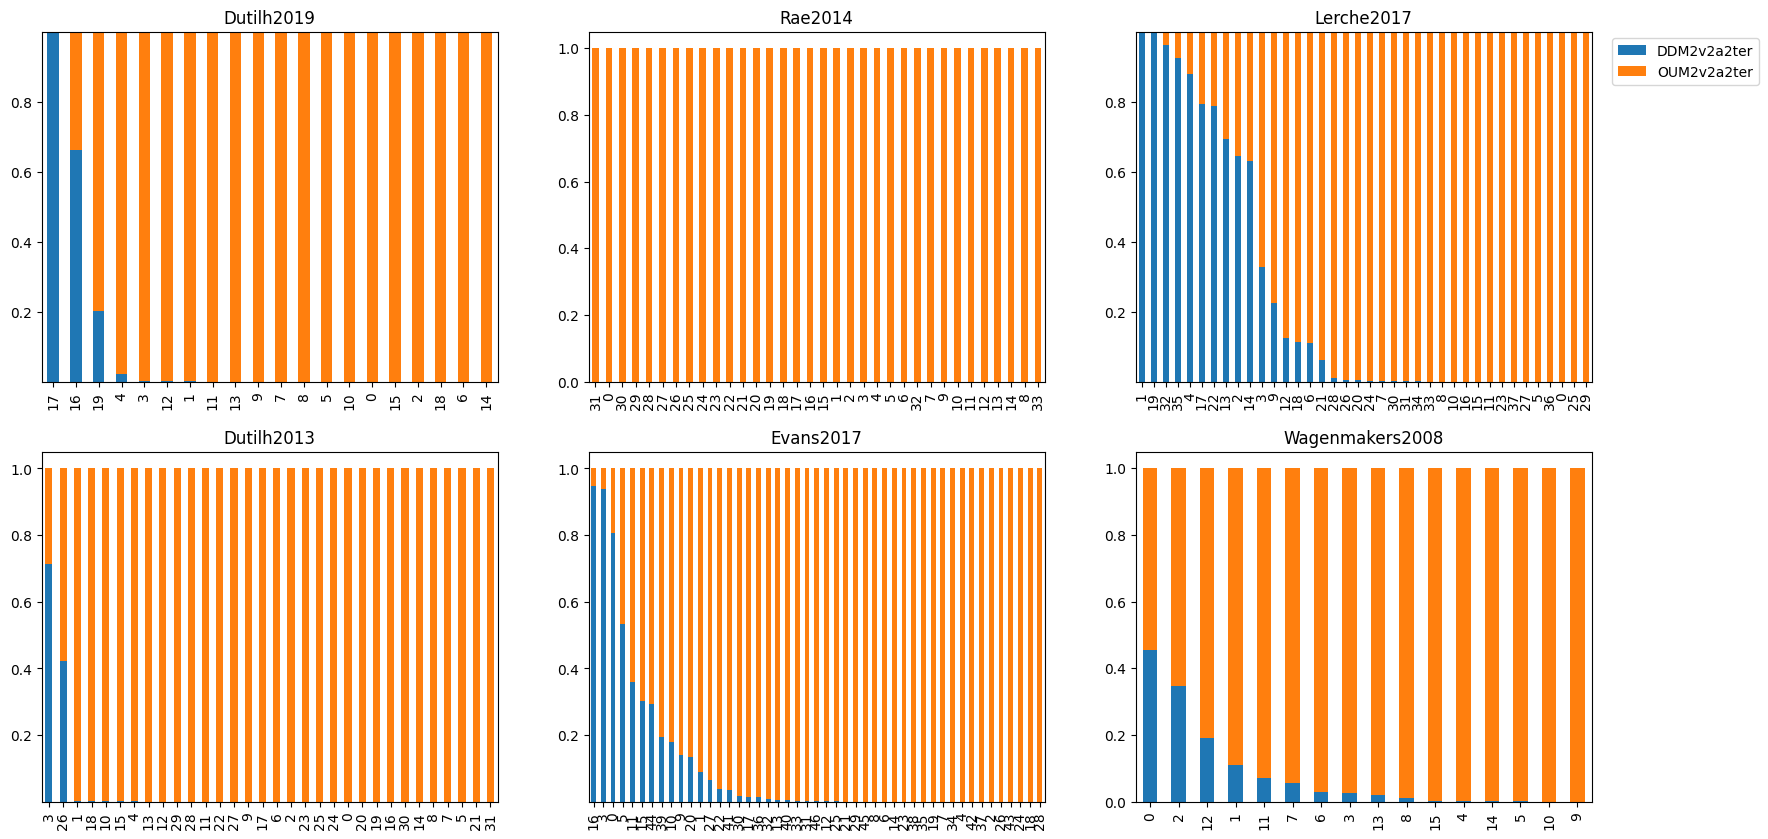

In [14]:
models = ["DDM2v2a2ter","OUM2v2a2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models,sortby="OUM2v2a2ter")
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models,sortby="OUM2v2a2ter")
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models,sortby="OUM2v2a2ter")
#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models,sortby="OUM2v2a2ter")


plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models,sortby="OUM2v2a2ter")
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models,sortby="OUM2v2a2ter")
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models,sortby="OUM2v2a2ter")
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models,sortby="OUM2v2a2ter")

axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



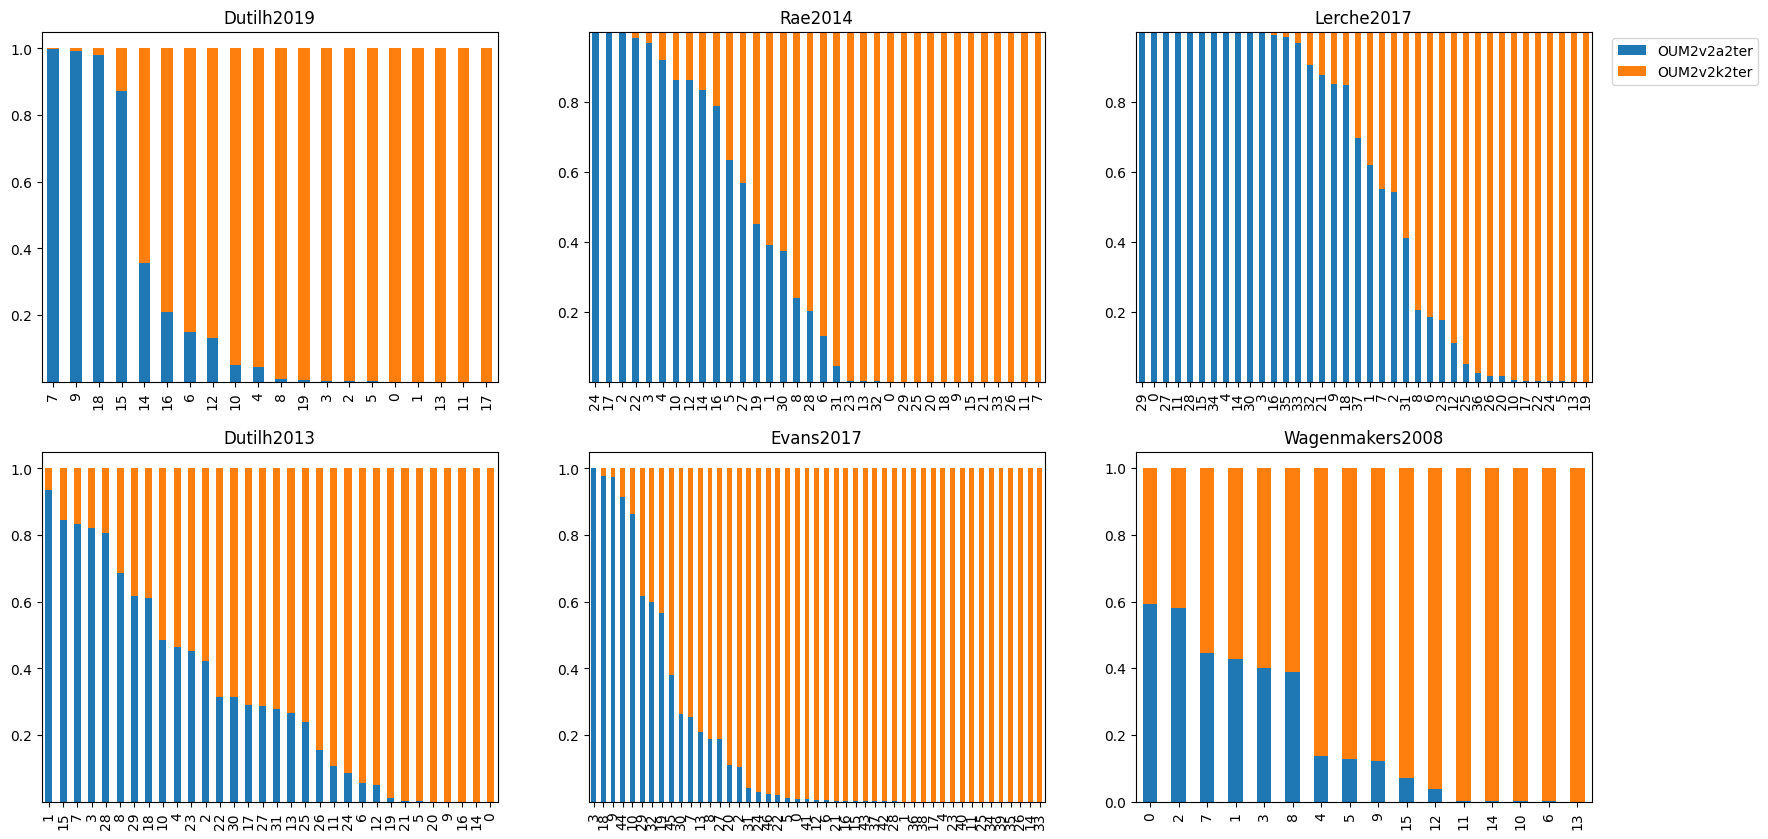

In [11]:
models = ["OUM2v2a2ter","OUM2v2k2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models)
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models)
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models)
#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models)


plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models)
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models)
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models)
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models)

axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



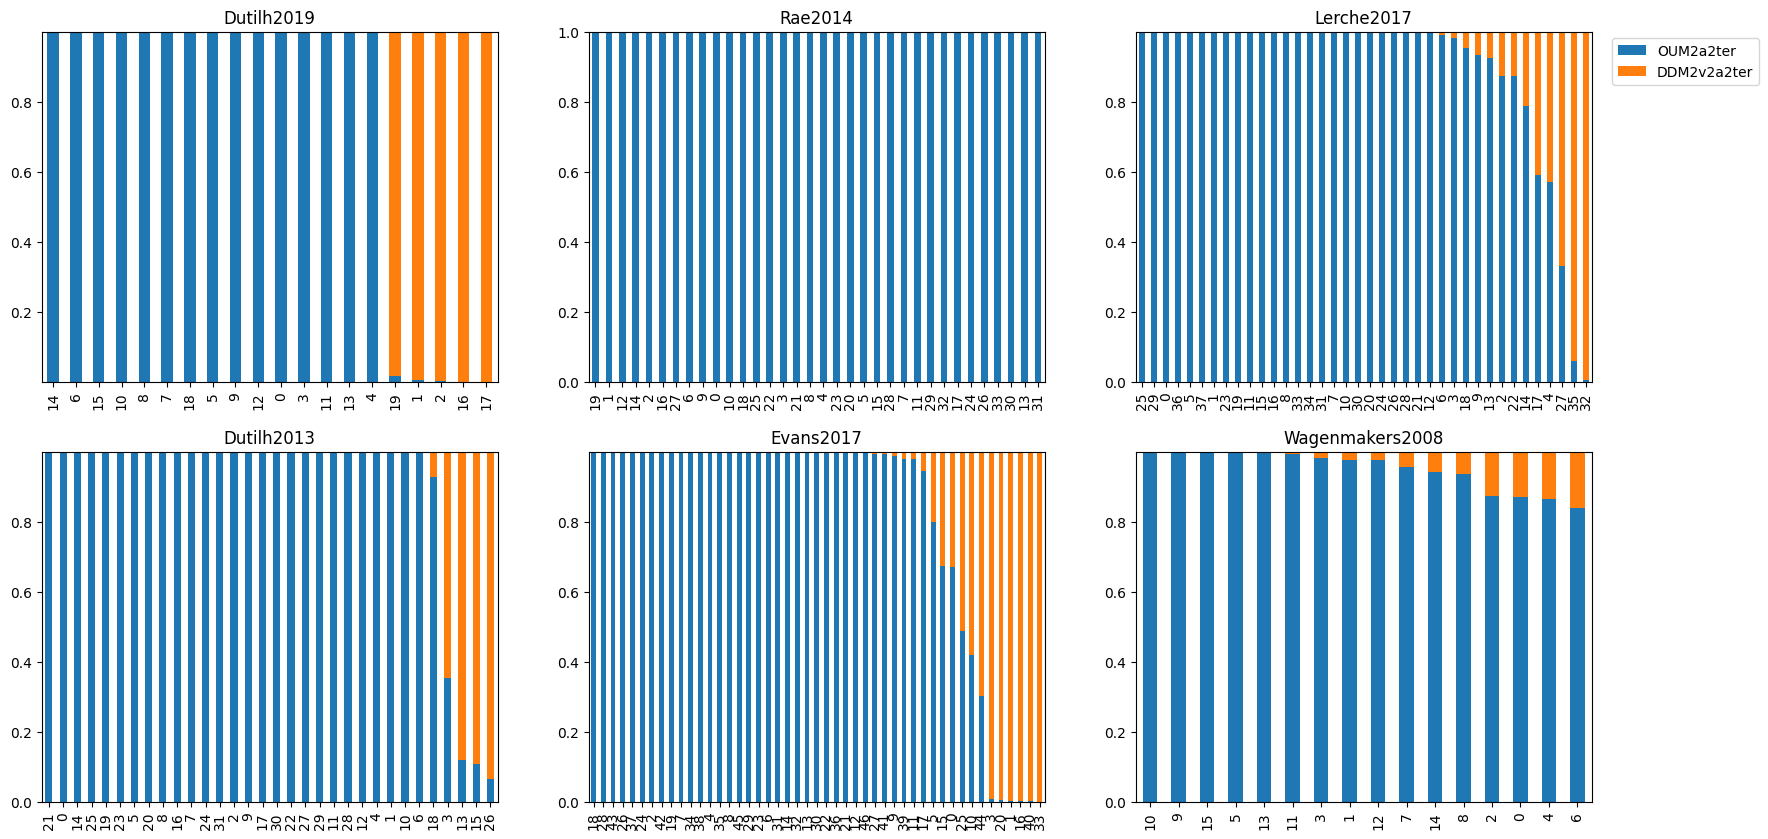

In [20]:
models = ["OUM2a2ter","DDM2v2a2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models,sortby="DDM2v2a2ter")
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models,sortby="DDM2v2a2ter")
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models,sortby="DDM2v2a2ter")
#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models,sortby="OUM2k2ter")


plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models,sortby="DDM2v2a2ter")
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models,sortby="DDM2v2a2ter")
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models,sortby="DDM2v2a2ter")
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models,sortby="OUM2k2ter")


axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



In [ ]:
models = ["DDM2a2ter","DDM2v2a2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models,sortby="OUM2k2ter")
#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models,sortby="OUM2k2ter")


plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models,sortby="OUM2k2ter")
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models,sortby="OUM2k2ter")


axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



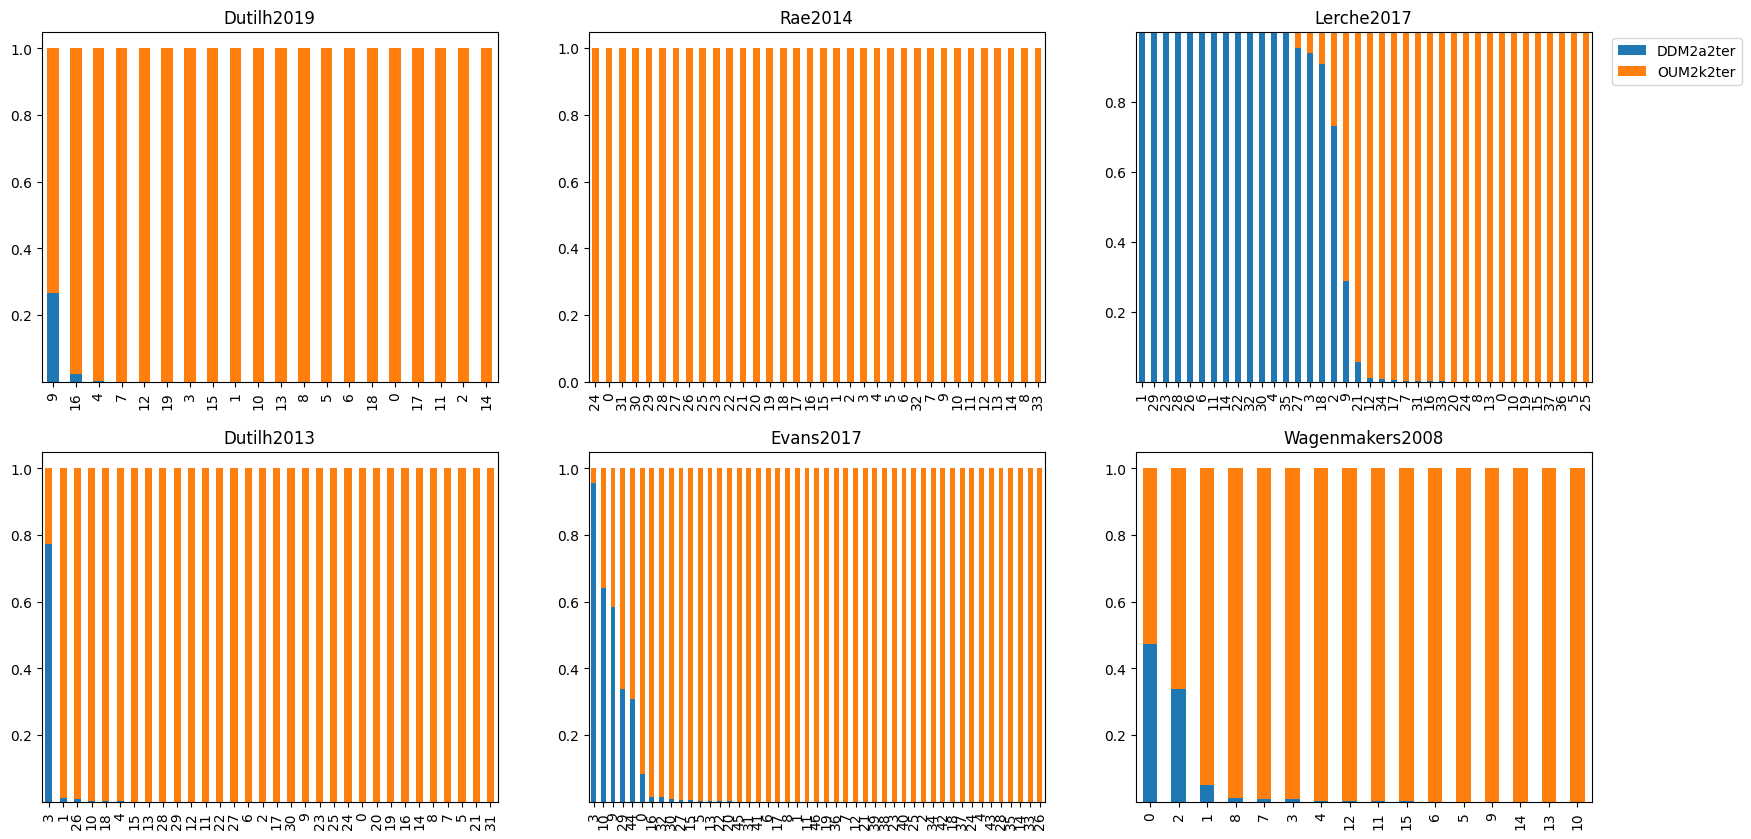

In [18]:
models = ["DDM2a2ter","OUM2k2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models,sortby="OUM2k2ter")
#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models,sortby="OUM2k2ter")


plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models,sortby="OUM2k2ter")
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models,sortby="OUM2k2ter")


axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



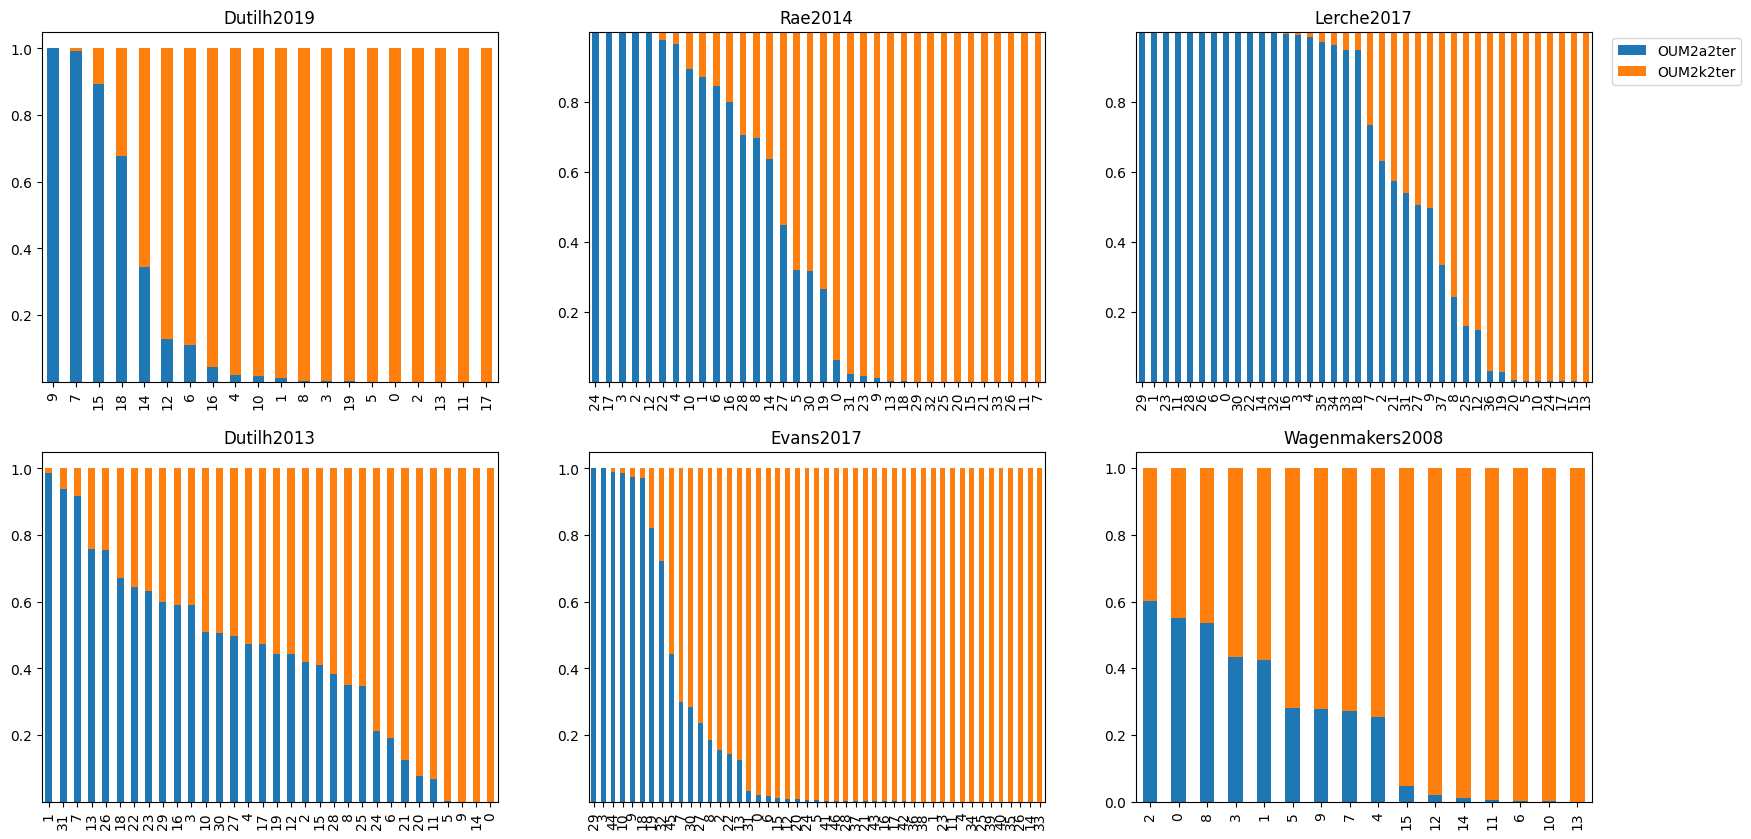

In [15]:
models = ["OUM2a2ter","OUM2k2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models,sortby="OUM2k2ter")
#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models,sortby="OUM2k2ter")


plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models,sortby="OUM2k2ter")
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models,sortby="OUM2k2ter")
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models,sortby="OUM2k2ter")


axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



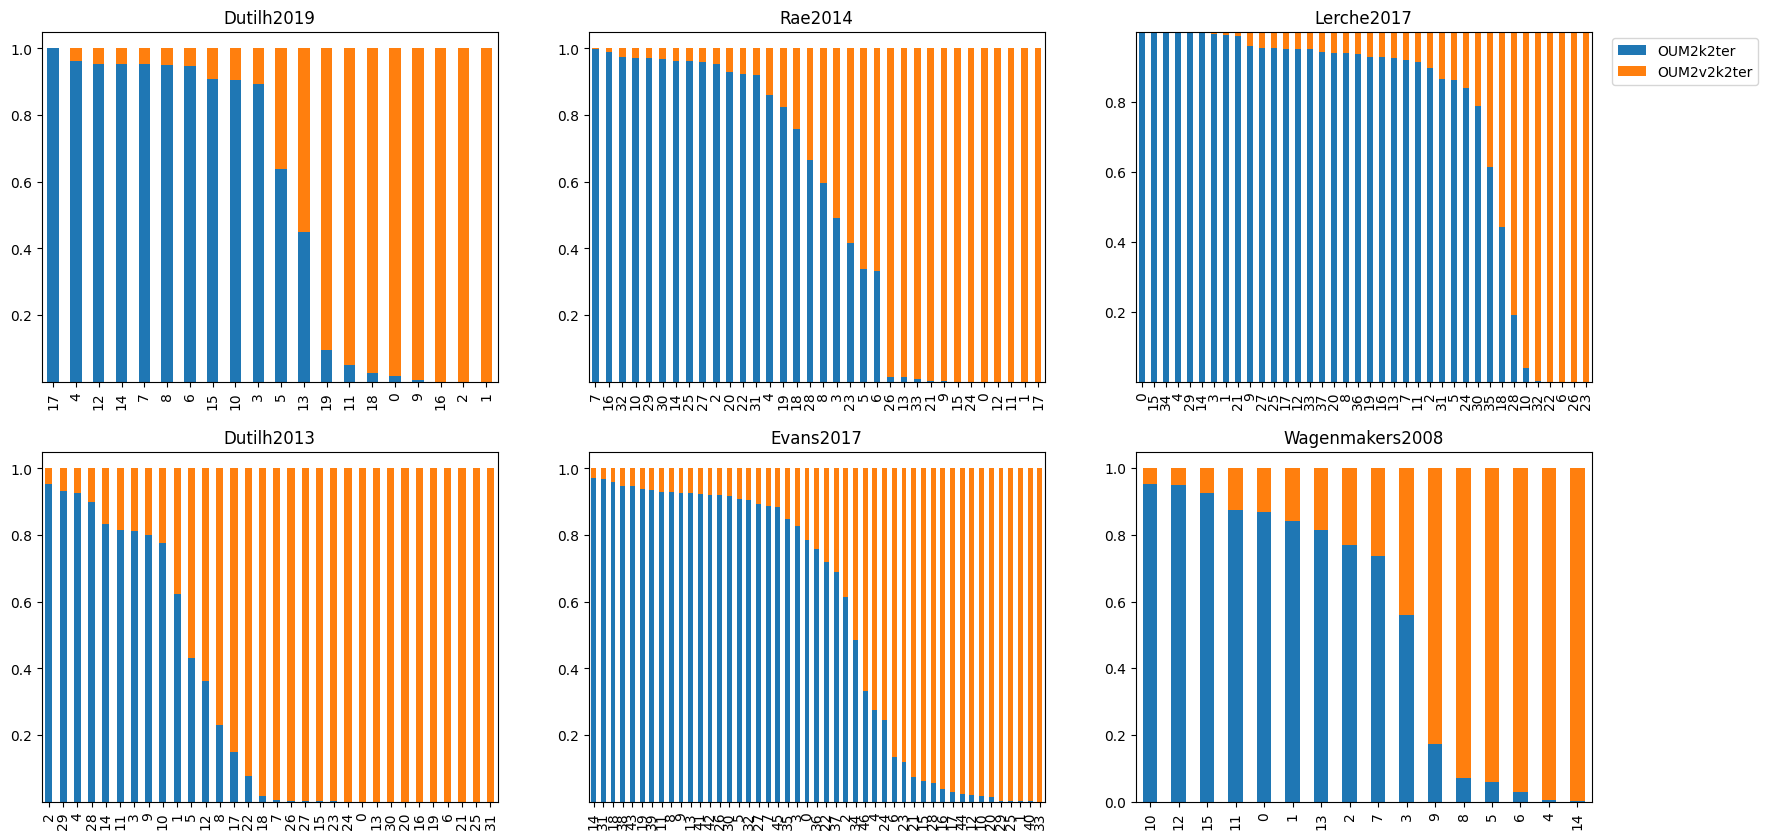

In [7]:
models = ["OUM2k2ter","OUM2v2k2ter"] 

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison(ax = axes[0,0],dataset = "Dutilh2019", models = models)
plot_BIC_comparison(ax = axes[0,1],dataset = "Rae2014", models = models)
plot_BIC_comparison(ax = axes[0,2],dataset = "Lerche2017", models = models)
#plot_BIC_comparison(ax = axes[0,3],dataset = "Taylor2023exp2", models = models)

plot_BIC_comparison(ax = axes[1,0],dataset = "Dutilh2013", models = models)
plot_BIC_comparison(ax = axes[1,1],dataset = "Evans2017", models = models)
plot_BIC_comparison(ax = axes[1,2],dataset = "Wagenmakers2008", models = models)
#plot_BIC_comparison(ax = axes[1,3],dataset = "Taylor2023exp3", models = models)

axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



In [31]:

def plot_BIC_comparison_merge(ax,dataset, models, sortby = "OUM2v2k2ter",color = plt.rcParams['axes.prop_cycle'].by_key()['color']):
    
    BIC_all = pd.DataFrame(columns = models)
    for model in models:
        if dataset=="Wagenmakers2008":
            BIC_all[model] = pd.DataFrame(np.array(pd.read_csv(model+"resultWagenmakers2008.csv").astype('float128').groupby('Participant')[['BIC']].mean()), columns = ["BIC"])
            BIC_all[model] = BIC_to_exp(BIC_all[model])
        else:
            BIC_all[model] = pd.read_csv(model+"result"+dataset+".csv").astype('float128')[['BIC']]
            BIC_all[model] = BIC_to_exp(BIC_all[model])

    BIC_all["Sum"] = BIC_all.sum(axis = 1)
    
    for model in models:
        BIC_all[model] = BIC_all[model]/BIC_all["Sum"]

    
    BIC_all = BIC_all.drop(labels = 'Sum',axis = 1)
    #####
    BIC_all["sort"] = BIC_all["OUM2v2k2ter"] + BIC_all["OUM2k2ter"]
    BIC_all = BIC_all.sort_values(by = "sort", axis = 0)
    BIC_all = BIC_all.drop(labels = 'sort',axis = 1)

    ####
    
    color = color[0:(len(models))]
    return BIC_all.plot(ax=ax, kind='bar', title = dataset, legend =False, stacked=True, color=color)


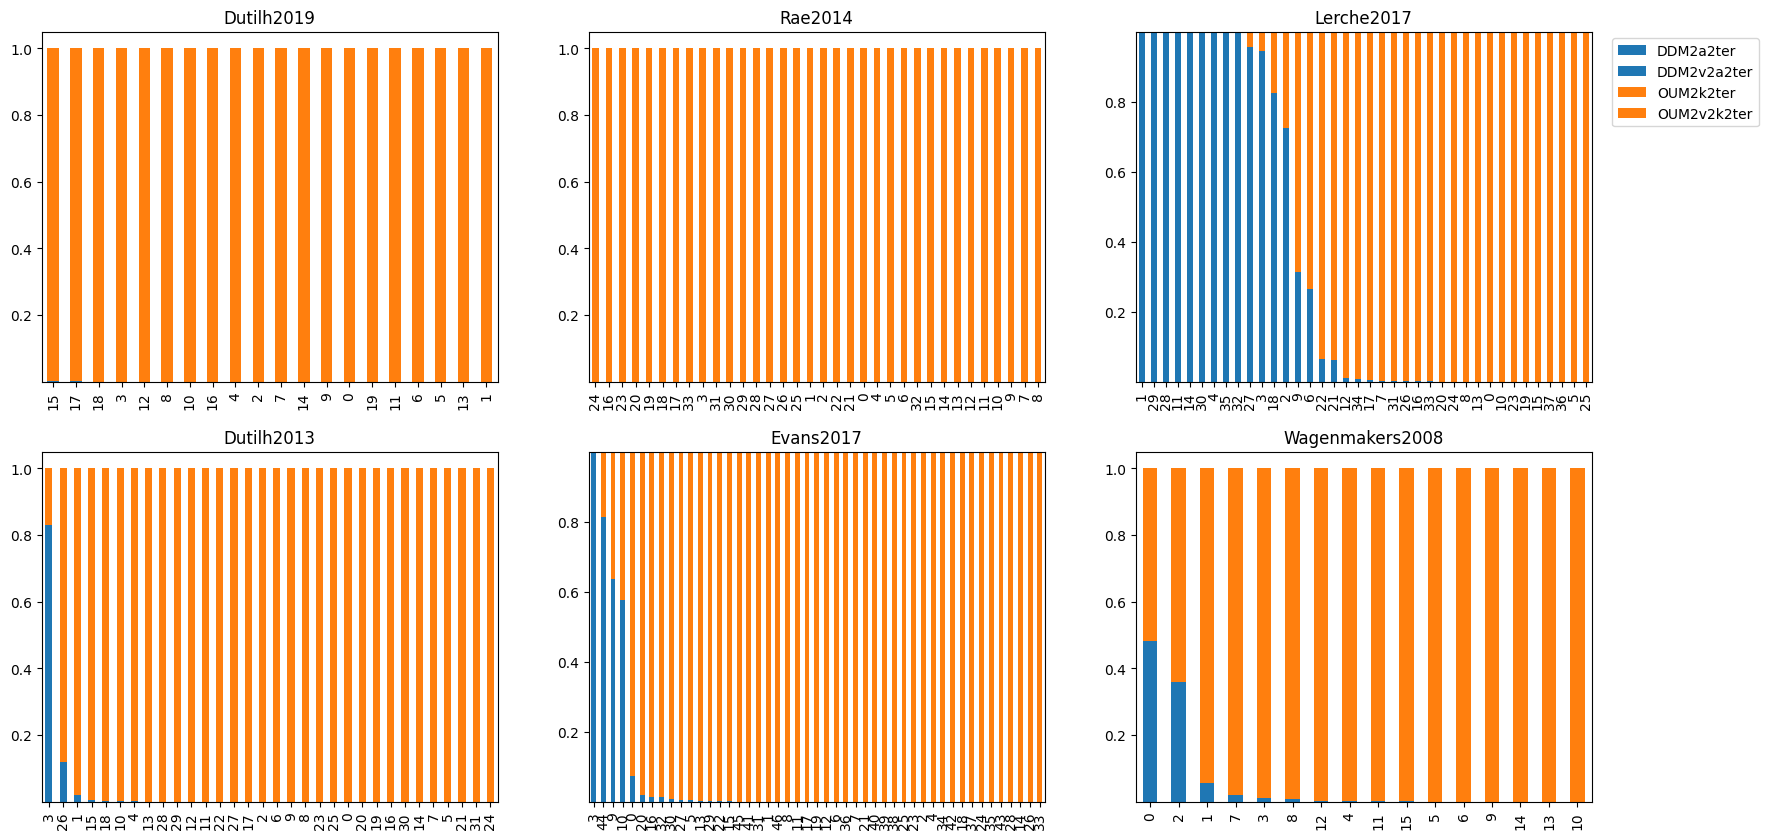

In [21]:
models = ["DDM2a2ter", "DDM2v2a2ter","OUM2k2ter","OUM2v2k2ter"] 
color = ['#1f77b4', '#1f77b4', '#ff7f0e','#ff7f0e']

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison_merge(ax = axes[0,0],dataset = "Dutilh2019", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[0,1],dataset = "Rae2014", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[0,2],dataset = "Lerche2017", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[1,0],dataset = "Dutilh2013", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[1,1],dataset = "Evans2017", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[1,2],dataset = "Wagenmakers2008", models = models, color=color)
axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))



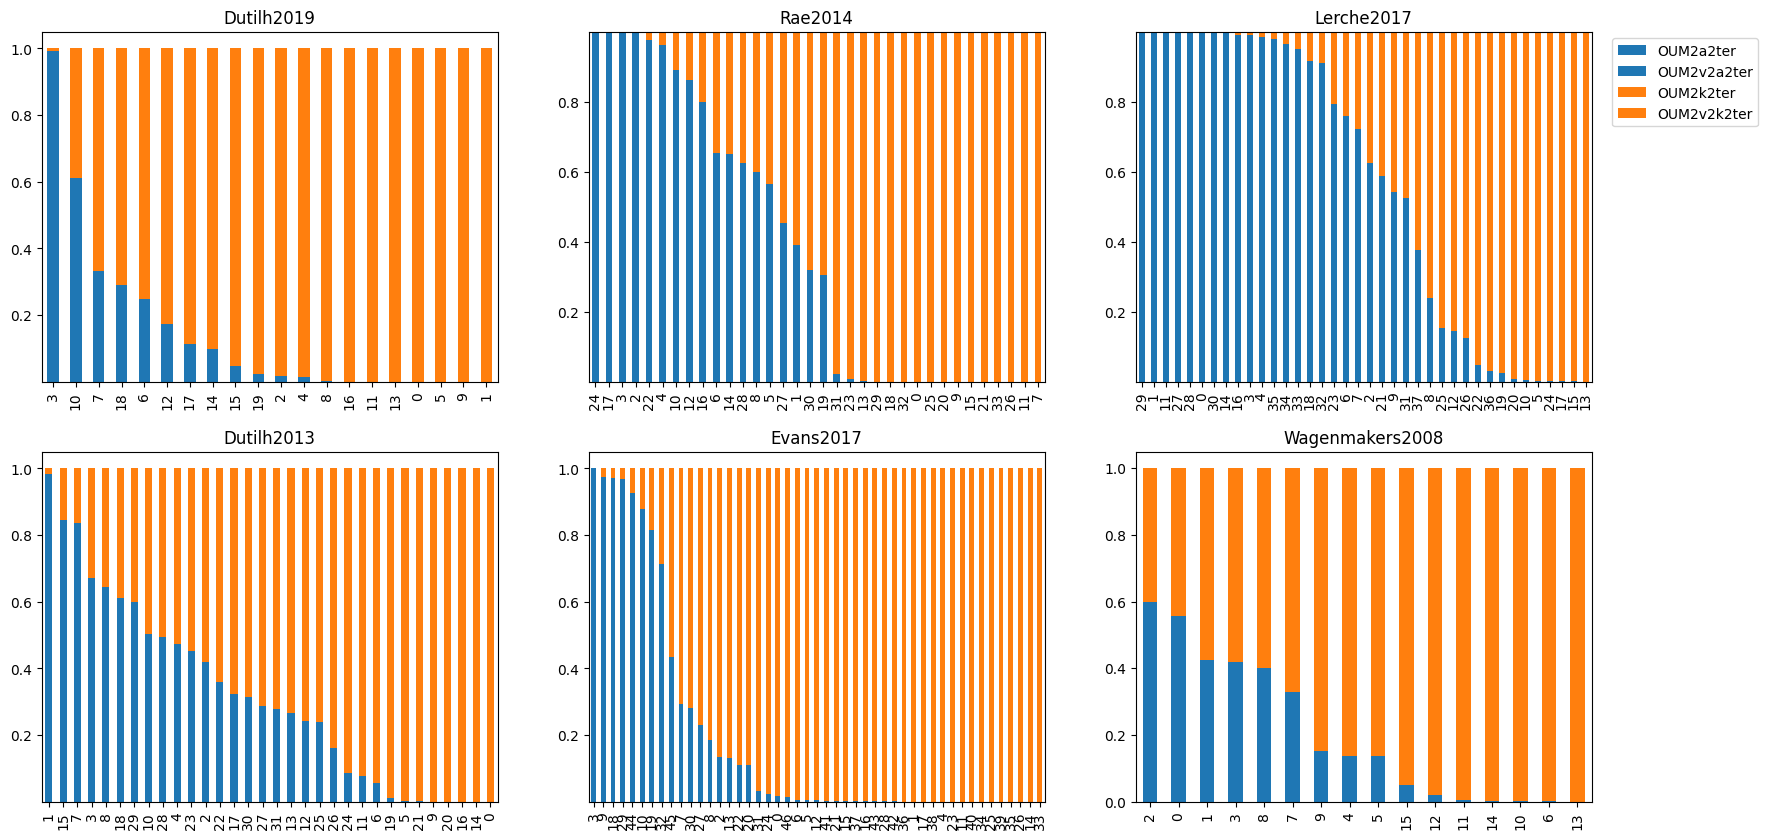

In [22]:
models = ["OUM2a2ter", "OUM2v2a2ter","OUM2k2ter","OUM2v2k2ter"] 
color = ['#1f77b4', '#1f77b4', '#ff7f0e','#ff7f0e']

figure, axes = plt.subplots(2,3,figsize=(20, 10))
#ax1.legend_.remove()
plot_BIC_comparison_merge(ax = axes[0,0],dataset = "Dutilh2019", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[0,1],dataset = "Rae2014", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[0,2],dataset = "Lerche2017", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[1,0],dataset = "Dutilh2013", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[1,1],dataset = "Evans2017", models = models, color=color)
plot_BIC_comparison_merge(ax = axes[1,2],dataset = "Wagenmakers2008", models = models, color=color)
axes[0,2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))

